<a href="https://colab.research.google.com/github/Patrick-Munyao/Powerline-Fault-Detection-and-Classification/blob/main/Powerline_Fault_Detection_%26_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Specifying the question

Electrical Fault
Definition: Fault in electrical equipment or apparatus is defined as an imperfection in the electrical circuit due to which current is deflected from the intended path. In other words, fault is the abnormal condition of the electrical system which damages the electrical equipment and disturbs the normal flow of the electric current.


**Types of Electrical Fault**

There are two main types of electric fault:


**Symmetrical** - Symmetrical fault is one that affects each of the phases equally. Its occurence is rare and 5% of transmission-line faults are symmetrical.

**Asymmetrical**- Here,  all the three phases are not affected equally unlike in symmetrical faults. Common types of asymmetric faults and their causes:

1. **Single Phase to Ground Fault** – It is also called a line-to-ground fault. It mainly occurs due to insulation breakdown between one of the phases and earth. Their chances of appearance in the power system are 70%.
2. **Phase-to-Phase Fault** – Such type of fault rarely occurs on the power system. It is also called Line-to-line fault. It occurs when two conductors are short circuited. Their chance of appearance is hardly 15% in the power system.
3. **Two Phases to Ground Fault** – In this type of fault breakdowns of insulation between two phases and earth occur. It is the most severe type of fault but rarely occurs in the power system. It is also called  Line-to-line-to-ground fault (L-L-G). Their chance of occurrence is hardly 10%.
4. **Phase to phase and Third Phase to Ground Fault** – It is the combination of phase to phase and phase to phase to ground fault. Such types of fault occur due to the breakdown of insulation between two phases and simultaneous breakdown of insulation between the third phase and earth. The chance of such a type of fault is hardly 2% to 3%.
5. **All the Three Phases to Ground Fault** – It is the most severe type of the fault and very rarely occurs in the power system. It occurs due to a breakdown of insulation between all the phases as well as to the earth. Its chance of occurence is 2% to 3% in the power system.

###Reason for faults

Possible causes of powerline faults include:

* Insulation failure or breakdown
* Lighting
* Power surge 
* Unbalance current or voltage 
* Stability fall 
* Mechanical fault in transmission line 
* Over voltage
* Temperature rise

###Study Objectives

The objective of our study is to build a supervised machine learning model that can be used to classify and predict all the signals in most efficient manner in incases where there is actually fault in the system.

The machine learning models employed include:

1. Linear regression

2. Logistic regression

4. Decision trees

5. Random forest

6. Support Vector Machine

7. KNN

8. Naive bayes

9. Multi layer perceptron

###Defining Metrics of Success 




This study is based on electric power fault. Considering the huge costs and other damages related with power faults, acquisition of precise results is of great importance. Misclassification could lead to frequent power faults and blackouts resulting in endless outcry among consumers. These power interruptions occur during the distribution of power from the generation end to user premises, affecting the system reliability and increasing the fault line restoration costs.

This study will only be considered successful if the following is achieved:
- Train numerous supervised models with relevant data for performance comparison. Model to be preferred for deployment should have an accuracy score of at least 99%. In addition, the model should be simple to understand (and non complex in structure), easy to train and implement, and have a good computational power.


###Definition of terminologies

Voltage is the potential difference between two points in an electric field, which causes current to flow in the circuit. The SI unit for voltage is Volts and denoted as V. Voltage is the cause of the current.	V= Work done/Charge

Current is the rate of flow of electrons/rate at which electric charge flows in a circuit at a particular point. Current's SI unit is Ampere (A) and current is denoted as I. Current is the effect of the voltage i.e. current cannot flow without voltage. I= Charge/ Time
The current flowing in a circuit is directly proportional to the applied voltage and inversely proportional to the resistance of the circuit, provided the temperature remains constant (Ohm's Law). As such, Current (I = V/R)

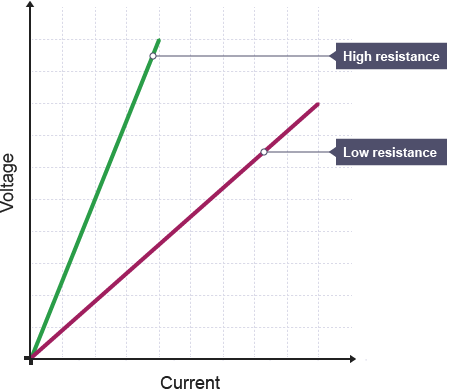

###What is a 3-phase power supply system?

Three-phase electric power is a common method of
alternating current electric power generation,
transmission, and distribution.

It is a type of polyphase system and is the most common method used by electrical grids worldwide to transfer power. It is also used to power
large motors and other heavy loads.

A three-wire three-phase circuit is usually more
economical than an equivalent two-wire single-phase
circuit at the same line to ground voltage because it uses
less conductor material to transmit a given amount of
electrical power

###Experimental design

The following steps wil be taken in this study:

1. Importing libraries and loading datasets
2. Checking the dataset and the components
3. Checking for possible anomalies in the dataset
4. Conducting necessary data preparation procedures
5. Conducting Exploratory Data Analysis and documenting the findings
6. Building a baseline model that we will use to compare our models to
7. Building decision trees and optimizing the trees for the best results
8. Determining appropriate data for SVM and training the data to the SVM model

# Loading Data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Loading detect dataset

detect_df = pd.read_csv('/content/detect_dataset.csv')

# Loading class_df dataset

class_df = pd.read_csv('/content/classData.csv')

##Previewing the datasets

In [2]:
# Previewing the detect data
detect_df.head()

Output (S)          Ia        Ib          Ic        Va        Vb        Vc  \
0           0 -170.472196  9.219613  161.252583  0.054490 -0.659921  0.605431   
1           0 -122.235754  6.168667  116.067087  0.102000 -0.628612  0.526202   
2           0  -90.161474  3.813632   86.347841  0.141026 -0.605277  0.464251   
3           0  -79.904916  2.398803   77.506112  0.156272 -0.602235  0.445963   
4           0  -63.885255  0.590667   63.294587  0.180451 -0.591501  0.411050   

   Unnamed: 7  Unnamed: 8  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN

In [3]:
# Sampling 10 entries in the classification dataset
class_df.sample(10)

G  C  B  A          Ia          Ib          Ic        Va        Vb  \
1880  1  0  1  1 -192.935825  846.884964   51.837803  0.032227 -0.164014   
7799  0  0  0  0  -63.214278   84.572061  -24.242180 -0.411079 -0.177621   
202   1  0  0  1  754.962001   69.431836  -24.291765 -0.245711  0.114301   
1136  1  0  1  1 -343.487015  104.562751    3.794285  0.272043  0.011318   
2990  0  1  1  0  -23.291629  759.024194 -733.182061  0.273177  0.007696   
4598  1  1  1  1  884.764194 -465.400508 -419.359917  0.018723 -0.042328   
458   1  0  0  1 -828.558872  -33.725428  -18.150655 -0.069296  0.385627   
7828  0  0  0  0  -70.992440   64.517691    3.598380 -0.169719 -0.410037   
2458  0  1  1  0  -52.108447 -185.895956  240.436285 -0.507123 -0.040358   
772   1  0  0  1 -463.748008  -68.097413   41.433967  0.352243 -0.371984   

            Vc  
1880  0.131787  
7799  0.588700  
202   0.131410  
1136 -0.283360  
2990 -0.280873  
4598  0.023605  
458  -0.316330  
7828  0.579756  
2458  0.547481  
772   0.019741

##Checking the datasets

In [4]:
# Checking the column names for both datasets
print('Columns for detect_df:', detect_df.columns)

print('Columns for class_df:', class_df.columns)


Columns for detect_df: Index(['Output (S)', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc', 'Unnamed: 7',
       'Unnamed: 8'],
      dtype='object')
Columns for class_df: Index(['G', 'C', 'B', 'A', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'], dtype='object')


In [5]:
# Checking the shapes for both datasets

# detect_df
print(f"Detection dataset has {detect_df.shape[0]} rows and {detect_df.shape[1]} columns.")

# class_df
print(f"Dataset for classification has {class_df.shape[0]} rows and {class_df.shape[1]} columns.")

Detection dataset has 12001 rows and 9 columns.
Dataset for classification has 7861 rows and 10 columns.


In [6]:
# Checking the sizes of each dataset
print('Detect_df size:', detect_df.size)
print('Class_df size:', class_df.size)

Detect_df size: 108009
Class_df size: 78610


Size and shape of a dataframe in pandas python: Size of a dataframe is the number of fields in the dataframe which is nothing but number of rows * number of columns. Shape of a dataframe gets the number of rows and number of columns of the dataframe.

#Data Preparation

###Uniformity

In [7]:
# Checking data information
detect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


The detection dataset contains integers and float values and all the variables are in the correct data types. 

In [8]:
# Checking uniformity in the class_df

class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


The classification dataset contains integers and float values and all the variables are in the correct data types. 

##Completeness

In [9]:
# Checking sum of null values in class_df

class_df.isna().sum()

G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64

No null values in the dataset for classification

In [10]:
# Checking for null values in detect dataset

detect_df.isna().sum()

Output (S)        0
Ia                0
Ib                0
Ic                0
Va                0
Vb                0
Vc                0
Unnamed: 7    12001
Unnamed: 8    12001
dtype: int64

Both Unnamed columns 7&8 have 12001 missing values

In [11]:
# Checking the percentage of missing values per column

percent_missing = detect_df.isnull().sum() * 100 / len(detect_df)
missing_values_detect_df = pd.DataFrame({'column_name': detect_df.columns,
                                 'percent_missing': percent_missing})
missing_values_detect_df

column_name  percent_missing
Output (S)  Output (S)              0.0
Ia                  Ia              0.0
Ib                  Ib              0.0
Ic                  Ic              0.0
Va                  Va              0.0
Vb                  Vb              0.0
Vc                  Vc              0.0
Unnamed: 7  Unnamed: 7            100.0
Unnamed: 8  Unnamed: 8            100.0

In [12]:
# Dropping the last 2 columns from detect_df dataset.

detect_df = detect_df.drop(detect_df[['Unnamed: 7', 'Unnamed: 8']],axis=1)
detect_df.head()

Output (S)          Ia        Ib          Ic        Va        Vb        Vc
0           0 -170.472196  9.219613  161.252583  0.054490 -0.659921  0.605431
1           0 -122.235754  6.168667  116.067087  0.102000 -0.628612  0.526202
2           0  -90.161474  3.813632   86.347841  0.141026 -0.605277  0.464251
3           0  -79.904916  2.398803   77.506112  0.156272 -0.602235  0.445963
4           0  -63.885255  0.590667   63.294587  0.180451 -0.591501  0.411050

In [13]:
# Checking if all null values have been dropped

detect_df.isna().sum()

Output (S)    0
Ia            0
Ib            0
Ic            0
Va            0
Vb            0
Vc            0
dtype: int64

Data is now free of missing values.

##Consistency

In [14]:
# Checking for duplicates in both datasets
print(f"Detection dataset has {detect_df.duplicated().sum()} duplicate values.")

print(f"Classification has {class_df.duplicated().sum()} duplicate values.")

Detection dataset has 0 duplicate values.
Classification has 0 duplicate values.


There are not duplicates in any of the datasets.

##Outliers

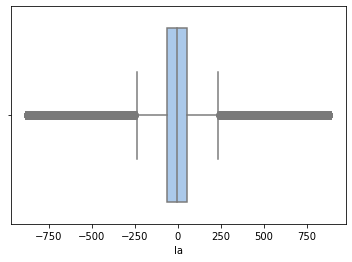

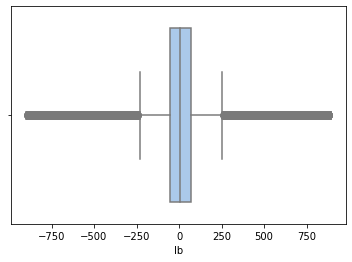

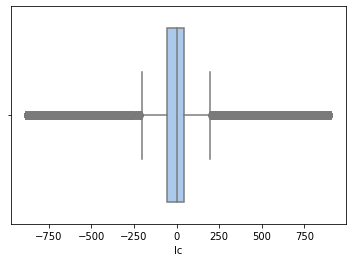

In [15]:
# Checking for outliers Current in detect_df
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sns.boxplot('Ia', data=detect_df, palette="pastel")
plt.show()
sns.boxplot('Ib', data=detect_df, palette="pastel")
plt.show()
sns.boxplot('Ic', data=detect_df, palette="pastel")
plt.show()

There are outliers for Current in each of the 3 phases.

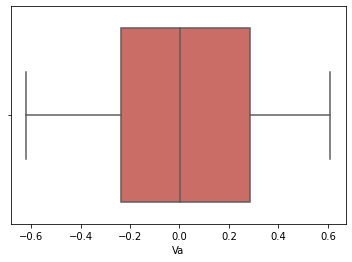

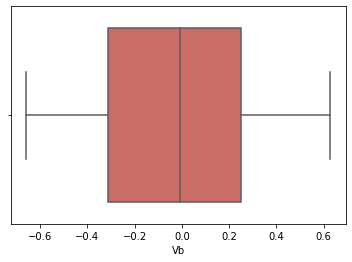

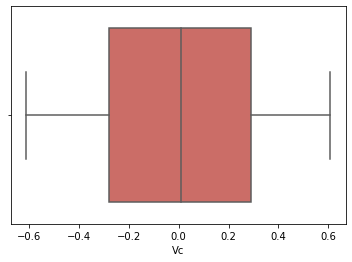

In [16]:
# Checking for outliers Voltage in detect_df

sns.boxplot('Va',data=detect_df, palette='hls')
plt.show()
sns.boxplot('Vb', data=detect_df, palette='hls')
plt.show()
sns.boxplot('Vc', data=detect_df, palette='hls')
plt.show()

There are no outliers for voltage in any of the 3 phases.

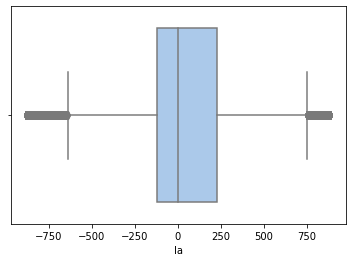

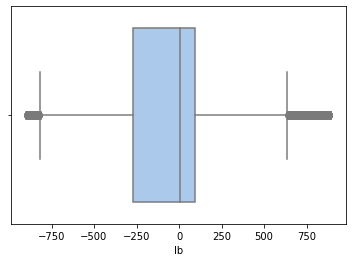

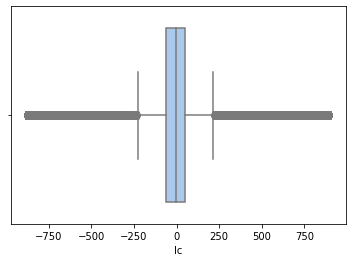

In [17]:
# Checking for outliers Current in class_df

sns.boxplot('Ia', data=class_df, palette="pastel")
plt.show()
sns.boxplot('Ib', data=class_df, palette="pastel")
plt.show()
sns.boxplot('Ic', data=class_df, palette="pastel")
plt.show()

There are outliers for Current in each of the 3 phases in classification dataset.

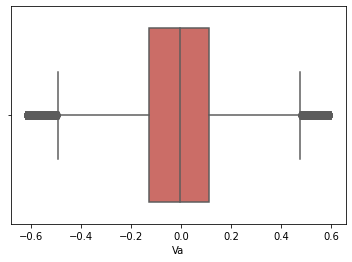

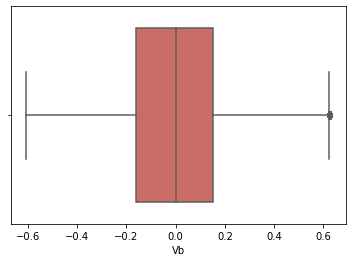

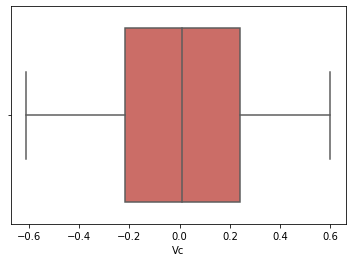

In [18]:
# Checking for outliers Voltage in class_df

sns.boxplot('Va',data=class_df, palette='hls')
plt.show()
sns.boxplot('Vb', data=class_df, palette='hls')
plt.show()
sns.boxplot('Vc', data=class_df, palette='hls')
plt.show()

In the classification dataset,both Va and Vb have outliers. Vc does not have outliers.

#Univariate Analysis

In [19]:
# Obtaining the statistical properties of the variables in detect_df

detect_df.describe()

Output (S)            Ia            Ib            Ic            Va  \
count  12001.000000  12001.000000  12001.000000  12001.000000  12001.000000   
mean       0.457962      6.709369    -26.557793     22.353043      0.010517   
std        0.498250    377.158470    357.458613    302.052809      0.346221   
min        0.000000   -883.542316   -900.526951   -883.357762     -0.620748   
25%        0.000000    -64.348986    -51.421937    -54.562257     -0.237610   
50%        0.000000     -3.239788      4.711283     -0.399419      0.002465   
75%        1.000000     53.823453     69.637787     45.274542      0.285078   
max        1.000000    885.738571    889.868884    901.274261      0.609864   

                 Vb            Vc  
count  12001.000000  12001.000000  
mean      -0.015498      0.004980  
std        0.357644      0.349272  
min       -0.659921     -0.612709  
25%       -0.313721     -0.278951  
50%       -0.007192      0.008381  
75%        0.248681      0.289681  
max        0.627875      0.608243

In [20]:
# Obtaining the statistical properties of the variables in class_df

class_df.describe()

G            C            B            A           Ia  \
count  7861.000000  7861.000000  7861.000000  7861.000000  7861.000000   
mean      0.432006     0.411271     0.555527     0.571429    13.721194   
std       0.495387     0.492095     0.496939     0.494903   464.741671   
min       0.000000     0.000000     0.000000     0.000000  -883.542316   
25%       0.000000     0.000000     0.000000     0.000000  -119.802518   
50%       0.000000     0.000000     1.000000     1.000000     2.042805   
75%       1.000000     1.000000     1.000000     1.000000   227.246377   
max       1.000000     1.000000     1.000000     1.000000   885.738571   

                Ib           Ic           Va           Vb           Vc  
count  7861.000000  7861.000000  7861.000000  7861.000000  7861.000000  
mean    -44.845268    34.392394    -0.007667     0.001152     0.006515  
std     439.269195   371.107412     0.289150     0.313437     0.307897  
min    -900.526951  -883.357762    -0.620748    -0.608016    -0.612709  
25%    -271.845947   -61.034219    -0.130287    -0.159507    -0.215977  
50%       5.513317    -4.326711    -0.005290     0.001620     0.009281  
75%      91.194282    49.115141     0.111627     0.153507     0.239973  
max     889.868884   901.274261     0.595342     0.627875     0.600179

###Univariate Analysis

0    6505
1    5496
Name: Output (S), dtype: int64 



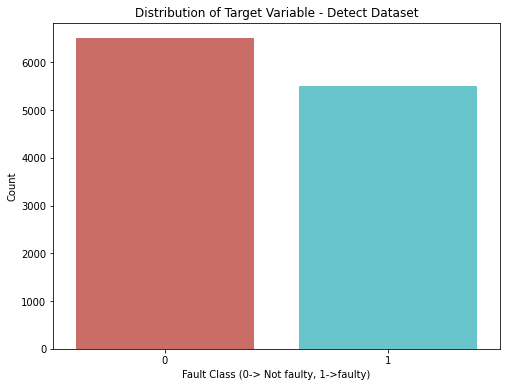

In [21]:
# Checking class balance for our target variable and confirm that it is binary. Uses sns.countplot()

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
print(detect_df['Output (S)'].value_counts(),"\n")
sns.countplot(x=detect_df['Output (S)'], palette='hls')
plt.title('Distribution of Target Variable - Detect Dataset')
plt.xlabel('Fault Class (0-> Not faulty, 1->faulty)')
plt.ylabel('Count')
plt.show()

Our target variable is fairly balanced with 6505 non-faulty observations and 5496 faulty records.

##Histograms & Kernel Density Estimate (KDE)

For Current Ia



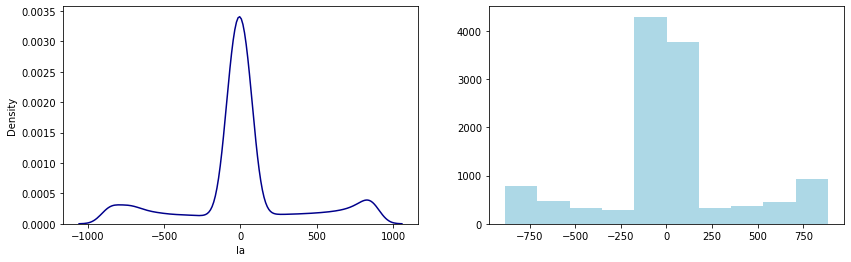

For Current Ib



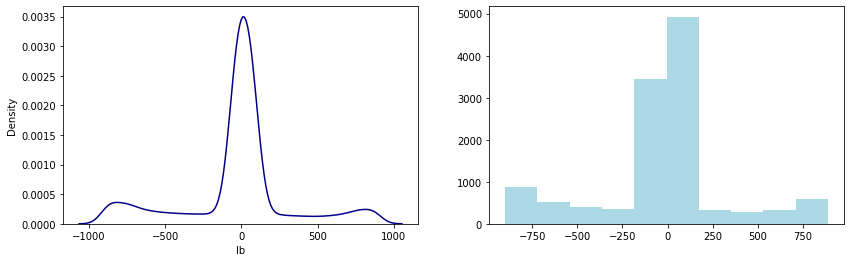

For Current Ic



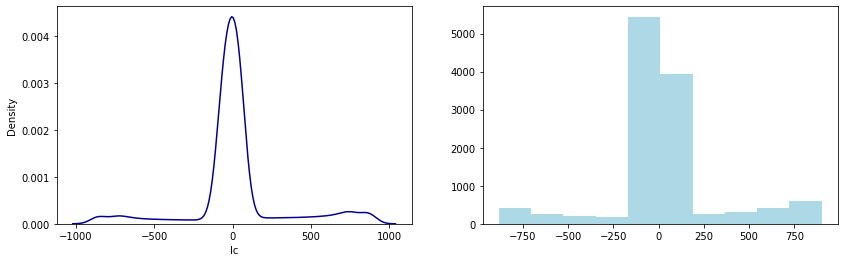

In [22]:
# Visualizing distribution of current in the 3 phases

for n,m in enumerate(detect_df.columns[1:4]):
    
    print(f"For Current {m}\n")
    plt.subplots(1,2,figsize=(14,4))
    plt.subplot(1,2,1) #the figure has 1 row, 2 columns, and this plot is the first plot.
    sns.kdeplot(x=detect_df[m],color='darkblue')

    plt.subplot(122)
    plt.hist(x=detect_df[m],color='lightblue')
    plt.show()

Current observations for the 3 phases is follows a gaussian distribution.

For Voltage Va



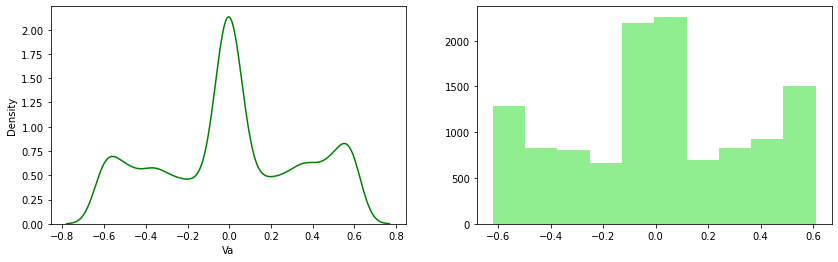

For Voltage Vb



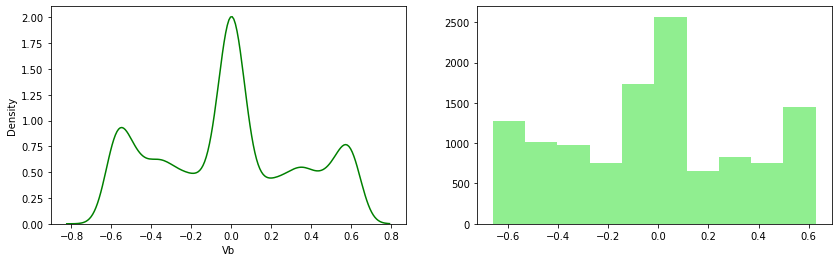

For Voltage Vc



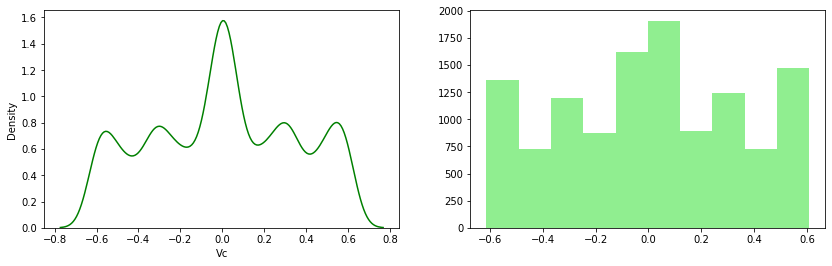

In [23]:
# Visualizing distribution of voltage in the 3 phases

for n,m in enumerate(detect_df.columns[4:]):
    
    print(f"For Voltage {m}\n")
    plt.subplots(1,2,figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(x=detect_df[m],color='green')

    plt.subplot(122)
    plt.hist(x=detect_df[m],color='lightgreen')
    plt.show()

Distribution of Voltage in the 3 phases follows a normal distribution.

## Line Plots

##Viewing current simulations for the 3-phases 

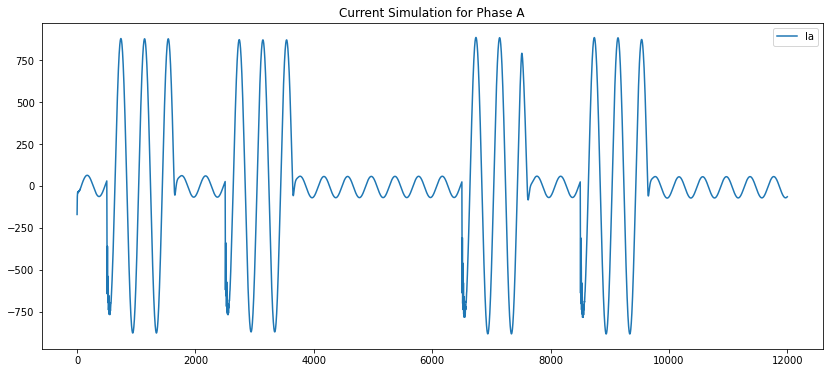

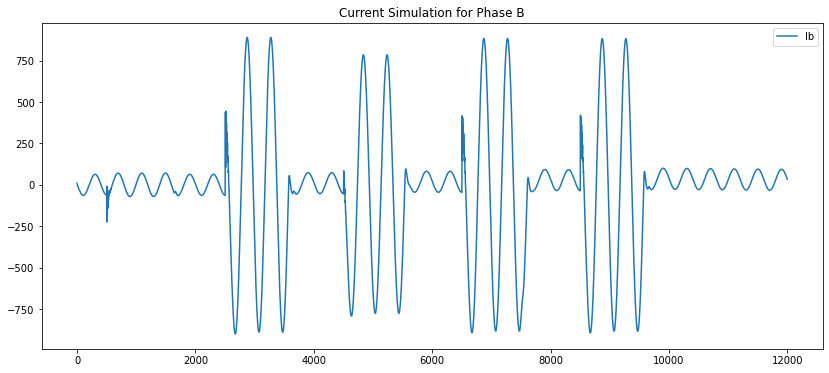

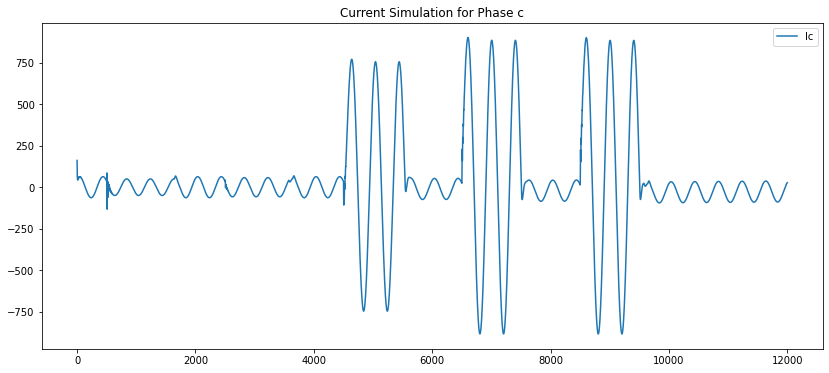

In [24]:
# Plotting the line plots for each phase
fig, ax=plt.subplots(figsize=(14,6))
detect_df.plot(y='Ia', ax=ax)
plt.title('Current Simulation for Phase A')
plt.show()

fig, ax=plt.subplots(figsize=(14,6))
detect_df.plot(y='Ib', ax=ax)
plt.title('Current Simulation for Phase B')
plt.show()

fig, ax=plt.subplots(figsize=(14,6))
detect_df.plot(y='Ic', ax=ax)
plt.title('Current Simulation for Phase c')
plt.show()

##Viewing Voltage simulations for the 3-phases

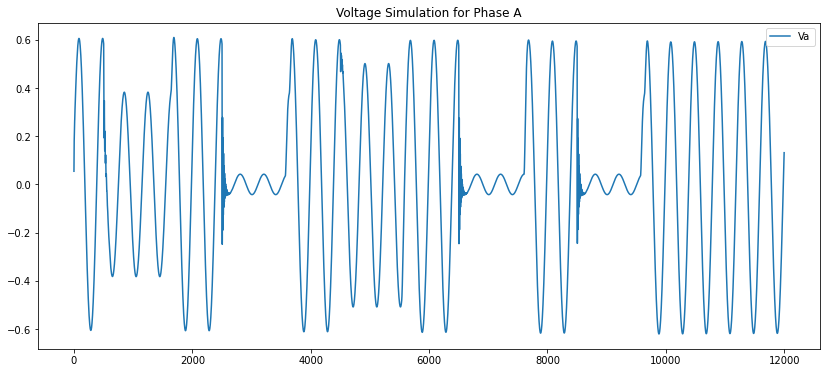

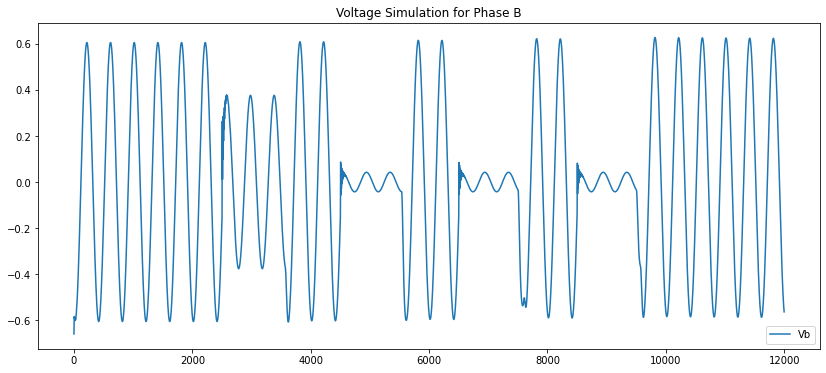

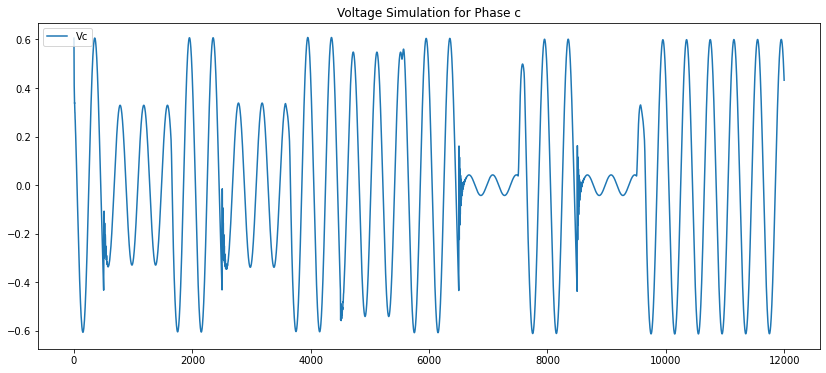

In [25]:
# Plotting the line plots for each phase
fig, ax=plt.subplots(figsize=(14,6))
detect_df.plot(y='Va', ax=ax)
plt.title('Voltage Simulation for Phase A')
plt.show()

fig, ax=plt.subplots(figsize=(14,6))
detect_df.plot(y='Vb', ax=ax)
plt.title('Voltage Simulation for Phase B')
plt.show()

fig, ax=plt.subplots(figsize=(14,6))
detect_df.plot(y='Vc', ax=ax)
plt.title('Voltage Simulation for Phase c')
plt.show()

Current simulations are smoother than that of the voltage for all the 3 phases 

In [26]:
# Creating column 'fault_types'
class_df['fault_types'] = class_df['G'].astype('str') + class_df['C'].astype('str') + class_df['B'].astype('str') + class_df['A'].astype('str')
class_df.head()

G  C  B  A          Ia          Ib          Ic        Va        Vb  \
0  1  0  0  1 -151.291812   -9.677452   85.800162  0.400750 -0.132935   
1  1  0  0  1 -336.186183  -76.283262   18.328897  0.312732 -0.123633   
2  1  0  0  1 -502.891583 -174.648023  -80.924663  0.265728 -0.114301   
3  1  0  0  1 -593.941905 -217.703359 -124.891924  0.235511 -0.104940   
4  1  0  0  1 -643.663617 -224.159427 -132.282815  0.209537 -0.095554   

         Vc fault_types  
0 -0.267815        1001  
1 -0.189099        1001  
2 -0.151428        1001  
3 -0.130570        1001  
4 -0.113983        1001

In [27]:
# Getting count for target variables
print(class_df['G'].value_counts(),"\n")

0    4465
1    3396
Name: G, dtype: int64 



In [28]:
print(class_df['C'].value_counts(),"\n")

0    4628
1    3233
Name: C, dtype: int64 



In [29]:
print(class_df['B'].value_counts(),"\n")

1    4367
0    3494
Name: B, dtype: int64 



In [30]:
print(class_df['A'].value_counts(),"\n")

1    4492
0    3369
Name: A, dtype: int64 



In [31]:
print(class_df['fault_types'].value_counts(),"\n")

0000    2365
1011    1134
1111    1133
1001    1129
0111    1096
0110    1004
Name: fault_types, dtype: int64 



In [32]:
# Defining the fault types in classification dataset
NF = class_df[class_df['fault_types']=='0000']
LG = class_df[class_df['fault_types']=='1001'] 
LL = class_df[class_df['fault_types']=='0110'] 
LLG = class_df[class_df['fault_types']=='1011'] 
LLL = class_df[class_df['fault_types']=='0111'] 
LLLG = class_df[class_df['fault_types']=='1111']

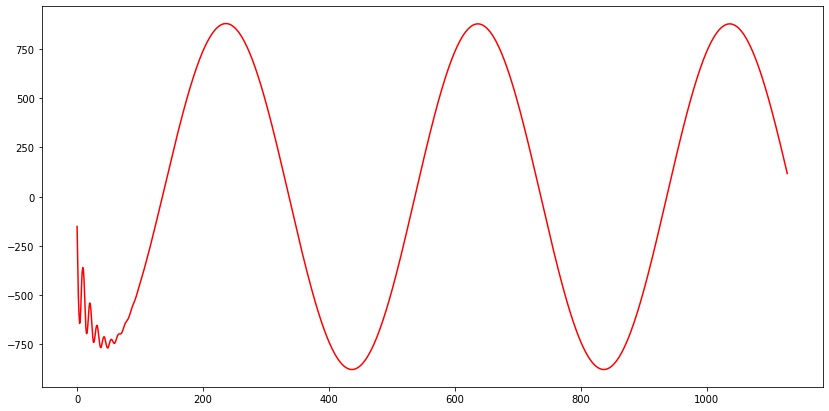

In [33]:
#Plotting NF line
plt.figure(figsize = (14,7))
plt.plot(class_df[class_df['fault_types']=='1001']["Ia"],'r')
#plt.plot(class_df[class_df['fault_types']=='0000']["Ia"],'b')

# Bivariate Analysis

###Viewing the faulty vs non-faulty Current(I) records in each of the 3 phases 

Text(0, 0.5, 'Wave Length')

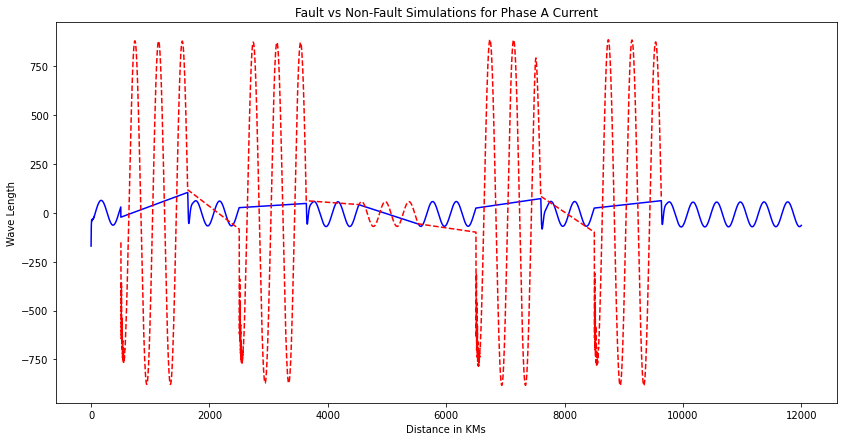

In [34]:
# Plotting the simulations 
plt.figure(figsize = (14,7))
plt.plot(detect_df[detect_df['Output (S)'] == 0]["Ia"],'b')
plt.plot(detect_df[detect_df['Output (S)'] == 1]["Ia"],'r--')
plt.title('Fault vs Non-Fault Simulations for Phase A Current')
plt.xlabel('Distance in KMs')
plt.ylabel('Wave Length')

Faulty observations have more noise (in red) than the non-faulty ones (in blue).

Text(0, 0.5, 'Wave Length')

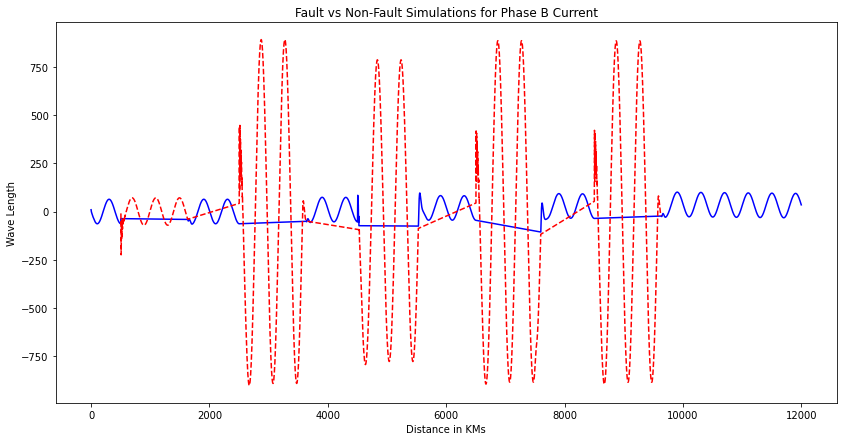

In [35]:
# Plotting the simulations 
plt.figure(figsize = (14,7))
plt.plot(detect_df[detect_df['Output (S)'] == 0]["Ib"],'b')
plt.plot(detect_df[detect_df['Output (S)'] == 1]["Ib"],'r--')
plt.title('Fault vs Non-Fault Simulations for Phase B Current')
plt.xlabel('Distance in KMs')
plt.ylabel('Wave Length')

Faulty observations have more noise (in red) than the non-faulty ones (in blue).

Text(0, 0.5, 'Wave Length')

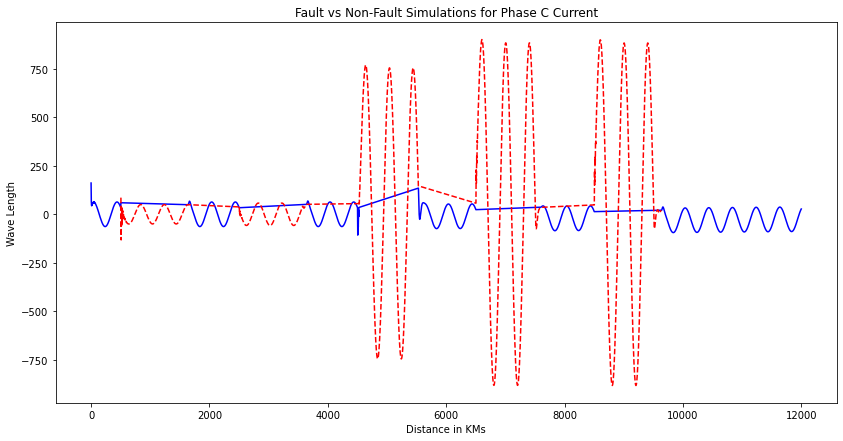

In [36]:
# Plotting the simulations 
plt.figure(figsize = (14,7))
plt.plot(detect_df[detect_df['Output (S)'] == 0]["Ic"],'b')
plt.plot(detect_df[detect_df['Output (S)'] == 1]["Ic"],'r--')
plt.title('Fault vs Non-Fault Simulations for Phase C Current')
plt.xlabel('Distance in KMs')
plt.ylabel('Wave Length')

Faulty observations have more noise (in red) than the non-faulty ones (in blue).

###Line Plots 

In [37]:
import plotly.express as px

# Line A
fig = px.line(detect_df, x = "Ia", y = "Va", title="For Line A", color = "Output (S)")
fig.show()

In [38]:
# Line B
fig = px.line(detect_df, x = "Ib", y = "Vb", title="For Line B", color = "Output (S)")
fig.show()

In [39]:
#Line C
fig = px.line(detect_df, x = "Ic", y = "Vc",title="For Line C",  color = "Output (S)")
fig.show()

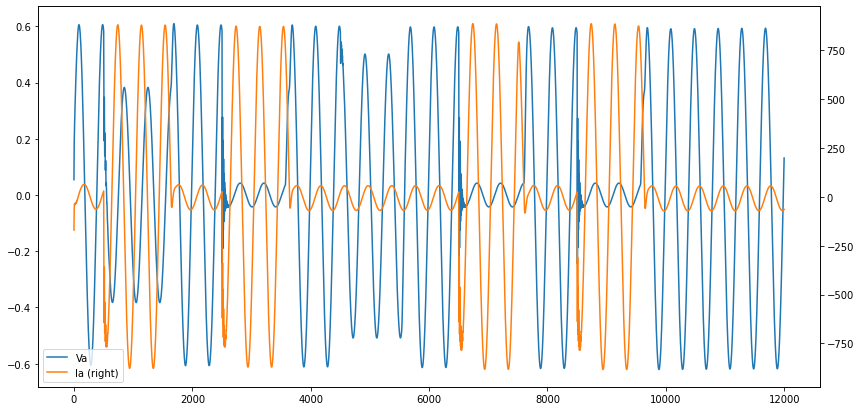

In [40]:
# Plotting phase A

fig, ax=plt.subplots(figsize=(14,7))
detect_df.plot(y='Va', ax=ax)
detect_df.plot(y='Ia', ax=ax, secondary_y=True)

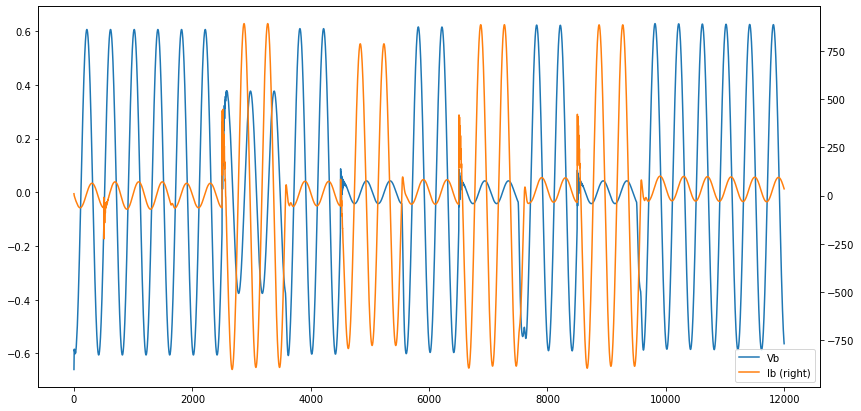

In [41]:
# Plotting phase B

fig, ax=plt.subplots(figsize=(14,7))
detect_df.plot(y='Vb', ax=ax)
detect_df.plot(y='Ib', ax=ax, secondary_y=True)

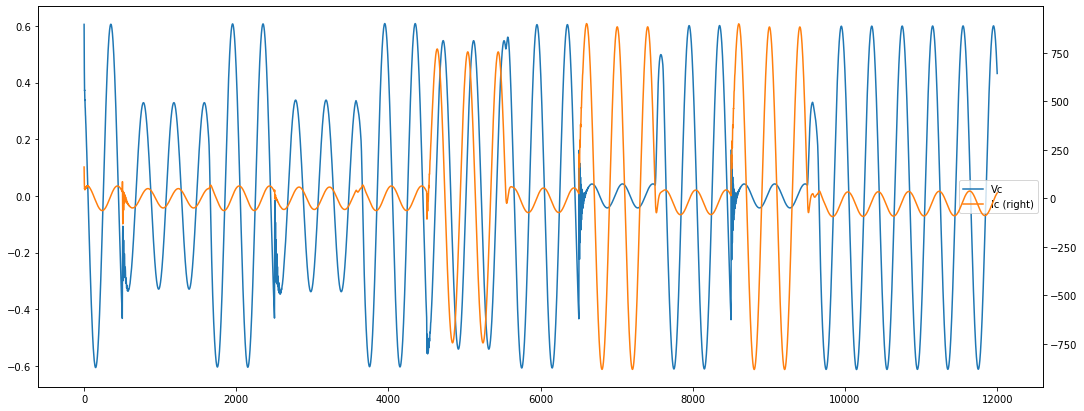

In [42]:
# Plotting phase C
fig, ax=plt.subplots(figsize=(18,7))
detect_df.plot(y='Vc', ax=ax)
detect_df.plot(y='Ic', ax=ax, secondary_y=True)

###Barplot

[G C B A]
[0 0 0 0] -> No fault 
[1 0 0 1] -> LG fault(Between Phase A and ground)
[0 1 1 0] -> LL fault(Between Phase A and Phase B)
[1 0 1 1] -> LLG Fault(Between Phases A,B and ground)
[0 1 1 1] -> LLL Fault(Between all three phases)
[1 1 1 1] -> LLLG fault(Three phase symmetrical fault)



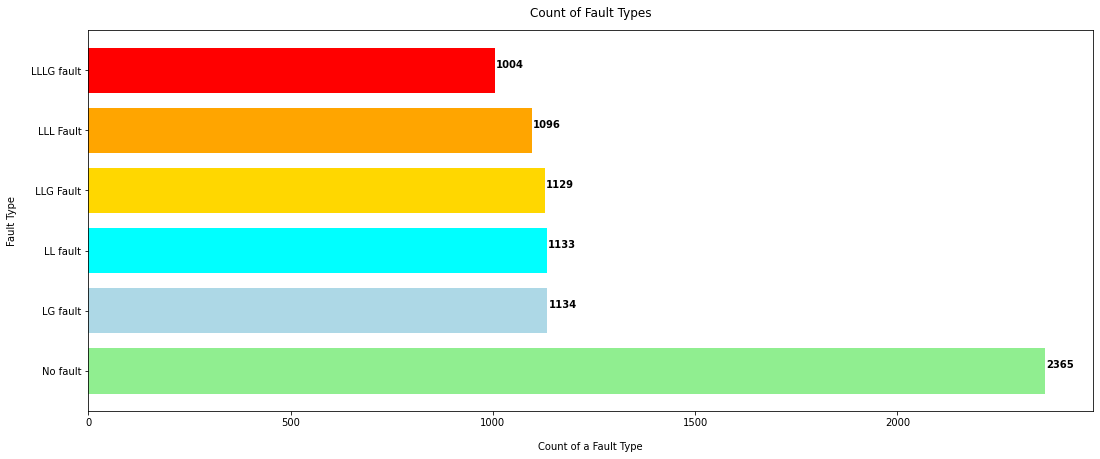

In [43]:
# Visualizing types of fault using a bars
%matplotlib inline
import matplotlib.pyplot as plt

print("[G C B A]\n[0 0 0 0] -> No fault \n[1 0 0 1] -> LG fault(Between Phase A and ground)\n[0 1 1 0] -> LL fault(Between Phase A and Phase B)\n[1 0 1 1] -> LLG Fault(Between Phases A,B and ground)\n[0 1 1 1] -> LLL Fault(Between all three phases)\n[1 1 1 1] -> LLLG fault(Three phase symmetrical fault)\n")
fault_types = "No fault", "LG fault", "LL fault", " LLG Fault", "LLL Fault", "LLLG fault"
x = fault_types
y = class_df.fault_types.value_counts()
fig, ax = plt.subplots(figsize=(18, 7))
plt.xlabel("Count of a Fault Type", labelpad=14)
plt.ylabel("Fault Type", labelpad=14)
plt.title("Count of Fault Types", y=1.02)
width = 0.75

ax.barh(x, y, width,  color =['lightgreen','lightblue','cyan','gold','Orange','red'])
 
for i, v in enumerate(y):
    ax.text(v + 3, i + .05, str(v),
            color = 'black', fontweight = 'bold')
plt.show()

The No fault class has the highest distribution with 2365 records, followed by LG, LL,LLG,LLL and LLLG faults with 1134,1133,1129,1096 and 1004 observations respectively. 

###Scatter Plots

For No Fault


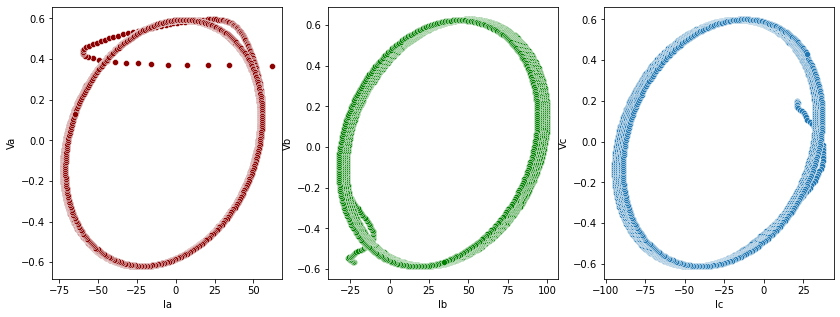

In [44]:
# Visualize none-faulty in the 3 phases  
print("For No Fault")
plt.subplots(1,3,figsize=(14,5))
plt.subplot(131)
sns.scatterplot(x=NF['Ia'],y=NF['Va'],color='darkred')

plt.subplot(132)
sns.scatterplot(x=NF['Ib'],y=NF['Vb'],color='green')

plt.subplot(133)
sns.scatterplot(x=NF['Ic'],y=NF['Vc'])

# plt.tight_layout()
plt.show()

From the above scatterplot,The smoother the line the less there fault is likely to be present

For LG fault - Between Phase A and ground 


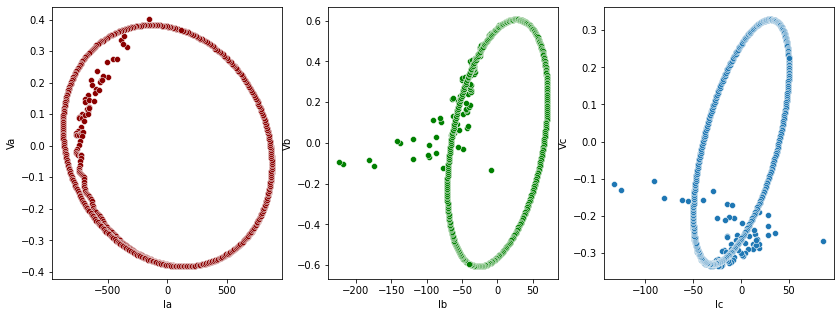

In [45]:
# Visualize LG fault
print("For LG fault - Between Phase A and ground ")
plt.subplots(1,3,figsize=(14,5))
plt.subplot(131)
sns.scatterplot(x=LG['Ia'],y=LG['Va'],color='darkred')

plt.subplot(132)
sns.scatterplot(x=LG['Ib'],y=LG['Vb'],color='green')

plt.subplot(133)
sns.scatterplot(x=LG['Ic'],y=LG['Vc'])

# plt.tight_layout()
plt.show()

For LL fault - Between Phase A and Phase B


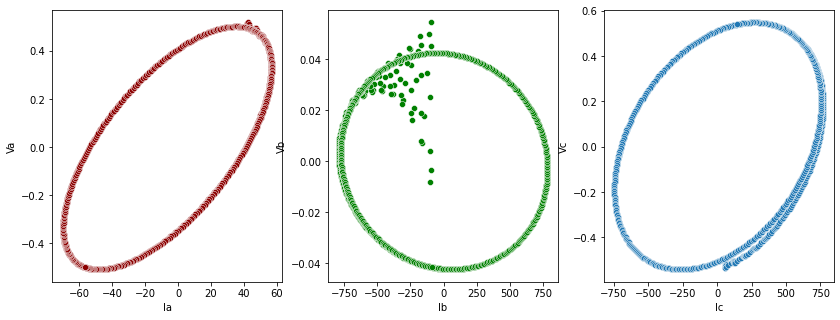

In [46]:
# Visualize LL fault 
print("For LL fault - Between Phase A and Phase B")
plt.subplots(1,3,figsize=(14,5))
plt.subplot(131)
sns.scatterplot(x=LL['Ia'],y=LL['Va'],color='darkred')

plt.subplot(132)
sns.scatterplot(x=LL['Ib'],y=LL['Vb'],color='green')

plt.subplot(133)
sns.scatterplot(x=LL['Ic'],y=LL['Vc'])

# plt.tight_layout()
plt.show()

For LLLG fault - Three phase symmetrical fault


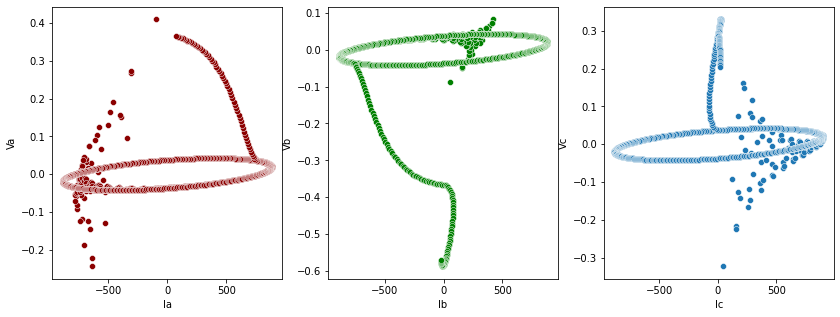

In [47]:
# Visualize LLLG fault in the 3 phases  
print("For LLLG fault - Three phase symmetrical fault")
plt.subplots(1,3,figsize=(14,5))
plt.subplot(131)
sns.scatterplot(x=LLLG['Ia'],y=LLLG['Va'],color='darkred')

plt.subplot(132)
sns.scatterplot(x=LLLG['Ib'],y=LLLG['Vb'],color='green')

plt.subplot(133)
sns.scatterplot(x=LLLG['Ic'],y=LLLG['Vc'])

# plt.tight_layout()
plt.show()

For LLG Fault - Between Phases A,B and Ground)


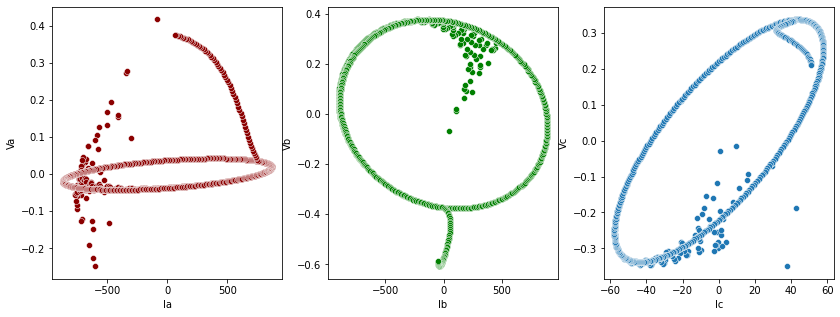

In [48]:
# Visualize LLG fault in the 3 phases  
print("For LLG Fault - Between Phases A,B and Ground)")
plt.subplots(1,3,figsize=(14,5))
plt.subplot(131)
sns.scatterplot(x=LLG['Ia'],y=LLG['Va'],color='darkred')

plt.subplot(132)
sns.scatterplot(x=LLG['Ib'],y=LLG['Vb'],color='green')

plt.subplot(133)
sns.scatterplot(x=LLG['Ic'],y=LLG['Vc'])

# plt.tight_layout()
plt.show()

In [49]:
#sns.stripplot(x="Ia", y="Va", data=detect_df)

In [50]:
#sns.swarmplot(x="Ia", y="Va", data=detect_df)

In [51]:
#sns.violinplot(x="Ia", y="Va", data=detect_df,palette='rainbow')

##Multivariate Analysis

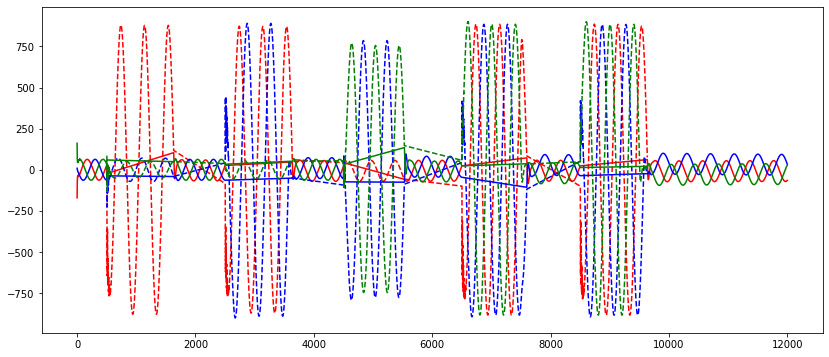

In [52]:
# Visualizing simulations in Current and Voltage flow in the 3 phases

plt.figure(figsize = (14,6))
plt.plot(detect_df[detect_df['Output (S)'] == 0]["Ia"],'r')
plt.plot(detect_df[detect_df['Output (S)'] == 1]["Ia"],'r--')
plt.plot(detect_df[detect_df['Output (S)'] == 0]["Ib"],'b')
plt.plot(detect_df[detect_df['Output (S)'] == 1]["Ib"],'b--')
plt.plot(detect_df[detect_df['Output (S)'] == 0]["Ic"],'g')
plt.plot(detect_df[detect_df['Output (S)'] == 1]["Ic"],'g--')

Text(0, 0.5, 'Wave Length')

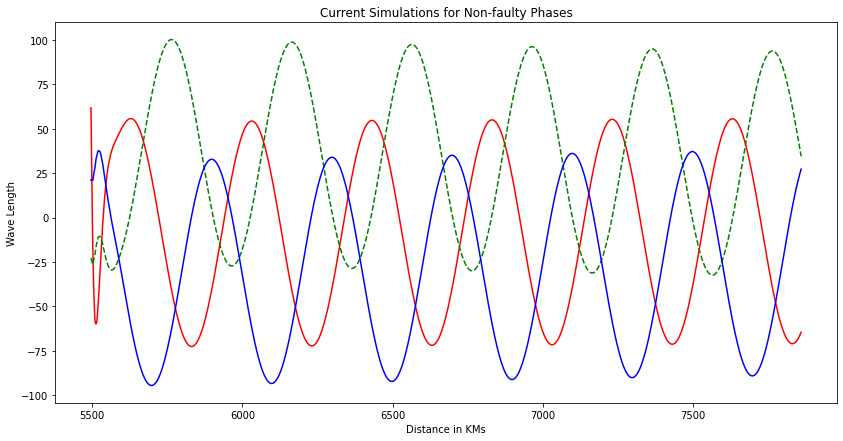

In [53]:
#Plotting all non fault conditions 
plt.figure(figsize = (14,7))
plt.plot(class_df[class_df['fault_types']=='0000']["Ia"],'r')
plt.plot(class_df[class_df['fault_types']=='0000']["Ib"],'g--')
plt.plot(class_df[class_df['fault_types']=='0000']["Ic"],'b')
plt.title('Current Simulations for Non-faulty Phases')
plt.xlabel('Distance in KMs')
plt.ylabel('Wave Length')

Text(0, 0.5, 'Wave Length')

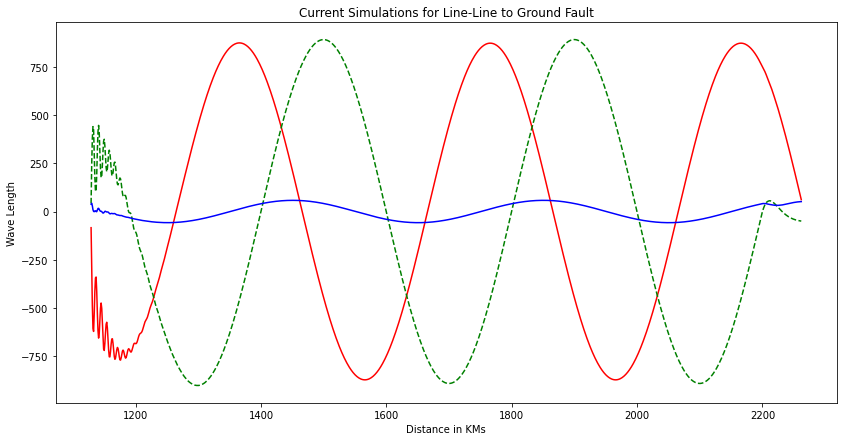

In [54]:
#Plotting LL fault in Current in the 3 phases
plt.figure(figsize = (14,7))
plt.plot(class_df[class_df['fault_types']=='1011']["Ia"],'r')
plt.plot(class_df[class_df['fault_types']=='1011']["Ib"],'g--')
plt.plot(class_df[class_df['fault_types']=='1011']["Ic"],'b')
plt.title('Current Simulations for Line-Line to Ground Fault')
plt.xlabel('Distance in KMs')
plt.ylabel('Wave Length')

Text(0, 0.5, 'Wave Length')

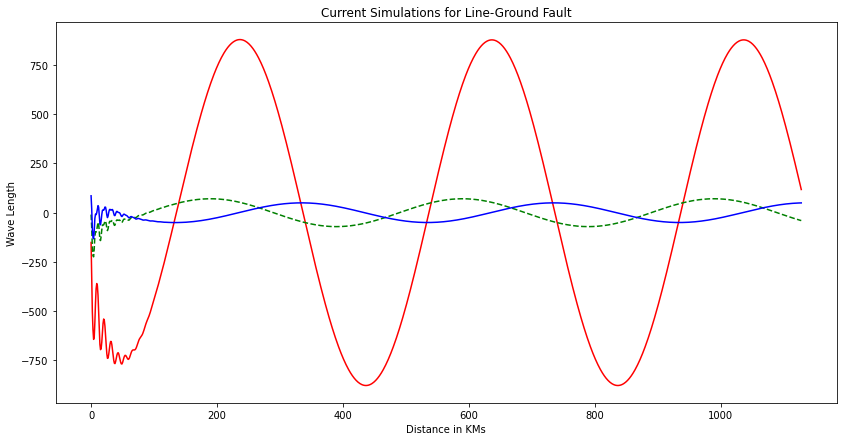

In [55]:
#Plotting LG fault in Current in the 3 phases
plt.figure(figsize = (14,7))
plt.plot(class_df[class_df['fault_types']=='1001']["Ia"],'r')
plt.plot(class_df[class_df['fault_types']=='1001']["Ib"],'g--')
plt.plot(class_df[class_df['fault_types']=='1001']["Ic"],'b')
plt.title('Current Simulations for Line-Ground Fault')
plt.xlabel('Distance in KMs')
plt.ylabel('Wave Length')

Text(0, 0.5, 'Wave Length')

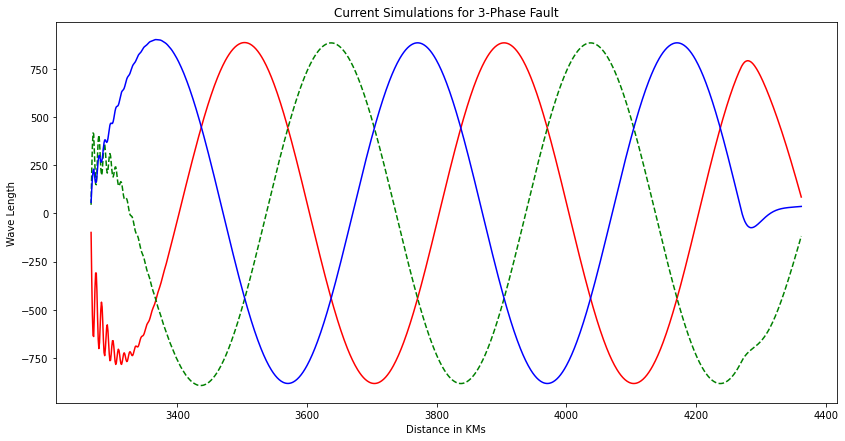

In [56]:
#Plotting LG fault in Current in the 3 phases
plt.figure(figsize = (14,7))
plt.plot(class_df[class_df['fault_types']=='0111']["Ia"],'r')
plt.plot(class_df[class_df['fault_types']=='0111']["Ib"],'g--')
plt.plot(class_df[class_df['fault_types']=='0111']["Ic"],'b')
plt.title('Current Simulations for 3-Phase Fault')
plt.xlabel('Distance in KMs')
plt.ylabel('Wave Length')

Text(0, 0.5, 'Wave Length')

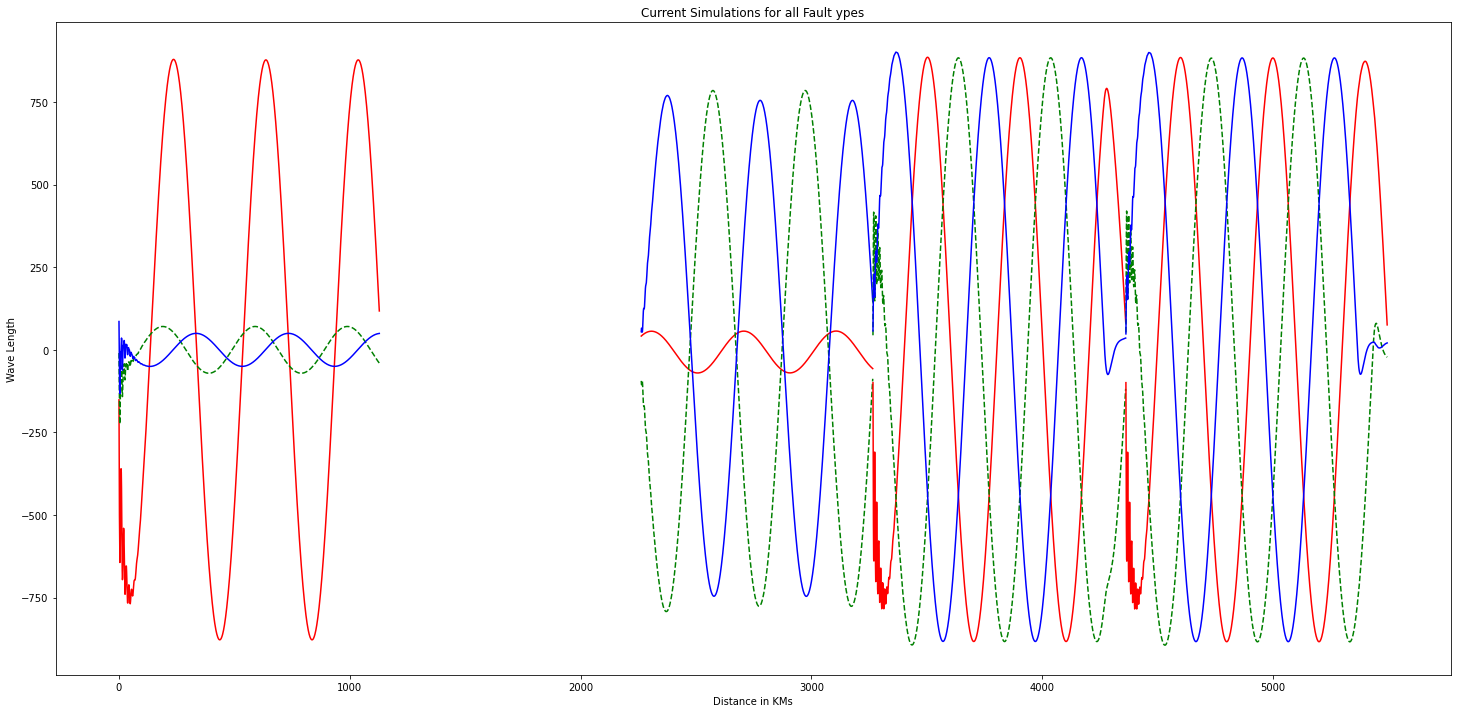

In [57]:
#Plotting all fault types in Current in the 3 phases
plt.figure(figsize = (25,12))
plt.plot(class_df[class_df['fault_types']=='1001']["Ia"],'r')
plt.plot(class_df[class_df['fault_types']=='1001']["Ib"],'g--')
plt.plot(class_df[class_df['fault_types']=='1001']["Ic"],'b')

plt.plot(class_df[class_df['fault_types']=='0110']["Ia"],'r')
plt.plot(class_df[class_df['fault_types']=='0110']["Ib"],'g--')
plt.plot(class_df[class_df['fault_types']=='0110']["Ic"],'b')

plt.plot(class_df[class_df['fault_types']=='0111']["Ia"],'r')
plt.plot(class_df[class_df['fault_types']=='0111']["Ib"],'g--')
plt.plot(class_df[class_df['fault_types']=='0111']["Ic"],'b')

plt.plot(class_df[class_df['fault_types']=='1111']["Ia"],'r')
plt.plot(class_df[class_df['fault_types']=='1111']["Ib"],'g--')
plt.plot(class_df[class_df['fault_types']=='1111']["Ic"],'b')

plt.title('Current Simulations for all Fault ypes')
plt.xlabel('Distance in KMs')
plt.ylabel('Wave Length')

#Data preprocessing - Detect Dataset

In [58]:
 # Importing relevant libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics

In [59]:
# Defining target and predictors in detect_df

detect_X = detect_df.drop(columns=['Output (S)'],axis=1)
detect_cols = detect_X.columns

detect_y = detect_df['Output (S)']

#detect_y = detect_df.iloc[:,0]

In [60]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.

# We will prefer MinMaxScaler to StandardScaler here. MinMaxScaler preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data.
# Also, MinMaxScaler doesn’t reduce the importance of outliers. The default range for the feature returned by MinMaxScaler is 0 to 1. 
# StandardScaler is least suited for a dataset with outliers, like in our case.
# RobustScaler is used if one wants to reduce the effects of outliers, relative to MinMaxScaler.

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(detect_X)

detect_X = pd.DataFrame(X_scaled, columns= detect_cols)

In [61]:
# previewing sampled predictor values after scaling
detect_X.sample(3)

Ia        Ib        Ic        Va        Vb        Vc
8607  0.272697  0.225166  0.998483  0.474840  0.527361  0.515910
2321  0.471986  0.537204  0.485750  0.088794  0.490881  0.943487
8035  0.476797  0.502712  0.518693  0.844882  0.070893  0.624398

In [62]:
# Checking statistical properties of detect_X
detect_X.describe()

Ia            Ib            Ic            Va            Vb  \
count  12001.000000  12001.000000  12001.000000  12001.000000  12001.000000   
mean       0.503171      0.488143      0.507506      0.512969      0.500408   
std        0.213170      0.199653      0.169252      0.281340      0.277718   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.463009      0.474255      0.464407      0.311339      0.268831   
50%        0.497548      0.505608      0.494757      0.506426      0.506857   
75%        0.529800      0.541872      0.520349      0.736078      0.705548   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 Vc  
count  12001.000000  
mean       0.505908  
std        0.286065  
min        0.000000  
25%        0.273359  
50%        0.508694  
75%        0.739087  
max        1.000000

In [63]:
# Split the detect dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(detect_X, detect_y, test_size=0.2, random_state=0)

#Modelling - Detect Dataset

#Base Model

##Logistic Regression

In [64]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [65]:
# Using our model to make a prediction
#
y_pred_logR = LogReg.predict(X_test)

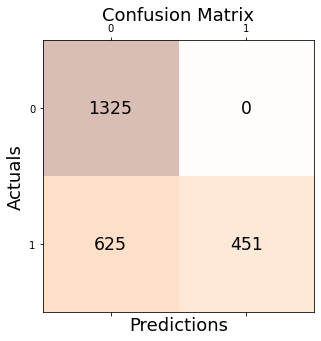

In [66]:
# Evaluating the model
#
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_logR)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confusion_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

* **True Positive (TP)**: TP represents the value of correct predictions of positives out of actual positive cases. All the 451 actual positives are correctly predicted as positive. 451 is the value of True Positive

* **False Positive (FP)**: FP represents the value of incorrect positive predictions. This value represents the number of negatives (out of 1950) which gets falsely predicted as positive. Out of the 1950 actual negatives, 625 are falsely predicted as positive.

* **True Negative (TN)**: TN represents the value of correct predictions of negatives out of actual negative cases. All the 1325 actual negatives are correctly predicted as negatives.

* **False Negative (FN)**: FN represents the value of incorrect negative predictions. It represents the number of positives (out of 1,076) which gets falsely predicted as negative. Out of 1,076 actual positive, 625 is falsely predicted as negative. Thus, the value of False Negative is 625.

Therefore, 1325 and 451 are the number of correct predictions. 625 is the number of incorrect predictions.

In [67]:
# Determining model accuracy and f1 score using classification_report()

print(classification_report(y_test,y_pred_logR))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81      1325
           1       1.00      0.42      0.59      1076

    accuracy                           0.74      2401
   macro avg       0.84      0.71      0.70      2401
weighted avg       0.82      0.74      0.71      2401



Observation: The model achieved f1-score of 81% and 59% in classifying non-faults and faults respectively.

F1-score is harmonic mean of precision and recall score and is used as a metrics in the scenarios where choosing either of precision or recall score can result in compromise in terms of model giving high false positives and false negatives respectively.

In [68]:
#print('F1 Score: %.3f' % f1_score(y_test, y_pred_logR))

###ROC Curve

Receiver Operating Characteristic (ROC) curve is a graph showing the performance of a classification model at all classification thresholds. Lowering the threshold classifies more items as positve, thus increasing both false positives and true positives. This curve plots 2 parameters: true positive rate (recall) and false positive rate. TPR = TP/TP+FN; FPR = FP/FP+TN. ROC is a common tool used in binary classifiers.

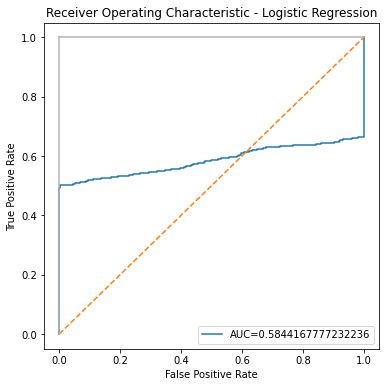

In [69]:
# Plotting the ROC curve
rf_prob = LogReg.predict_proba(X_test)[:,1]
#print(pd.DataFrame(rf_prob))
f_positive, t_positive, threshold = metrics.roc_curve(y_test, rf_prob)

from sklearn.metrics import roc_auc_score, roc_curve
# Calculate roc auc
auc = metrics.roc_auc_score(y_test,rf_prob)

plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(f_positive, t_positive, label="AUC="+str(auc))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


With the area under curve at 58.44%, our logistic regression is doing poorly in classifying the labels in our dataset.  

##KNN

In [70]:
# Importing relevant library and fitting our data to the classifier
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=5)
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [71]:
# Making predictions
# 
y_pred_KNN = KNN_classifier.predict(X_test)

# Printing a comparison frame for actual vs predicted values
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_KNN})
comparison_frame.describe()

Actual    Predicted
count  2401.000000  2401.000000
mean      0.448147     0.443982
std       0.497408     0.496956
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.000000     0.000000
75%       1.000000     1.000000
max       1.000000     1.000000

In [72]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1325
           1       1.00      0.99      0.99      1076

    accuracy                           1.00      2401
   macro avg       1.00      0.99      0.99      2401
weighted avg       1.00      1.00      0.99      2401



From the classification_report, our KNN classification model has an accuracy score of 100%. f1-score is 100% in classifying non-faulty observations and 99% for faulty observations. 

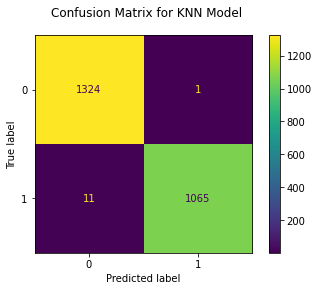

In [73]:
# Plotting Confusion matrix results
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

fig = plot_confusion_matrix(KNN_classifier, X_test,y_test, display_labels=KNN_classifier.classes_)
fig.figure_.suptitle("Confusion Matrix for KNN Model")
plt.show()

From the confusion matrix plot above, our model correctly classified 2388 (1324+1065) labels. Only 12 labels are misclassified. 

## Linear Regression

In [74]:
# Importing necessary LIbraries

import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from math import sqrt

In [75]:
# Import the LinearRegression class, instantiate it, and call the fit() method along with our training data. 
from sklearn.linear_model import LinearRegression
lin_regressor = linear_model.Lasso(alpha = 2.0)
#lin_regressor = LinearRegression()
lin_regressor.fit(X_train, y_train)

Lasso(alpha=2.0)

In [76]:
# The y_pred is a numpy array that contains all the predicted values 
# for the input values in the X_test series.
# 
linreg_pred = lin_regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values, execute the following 
df = pd.DataFrame({'Actual': y_test, 'Predicted': linreg_pred})

In [77]:
detect_df.describe()

Output (S)            Ia            Ib            Ic            Va  \
count  12001.000000  12001.000000  12001.000000  12001.000000  12001.000000   
mean       0.457962      6.709369    -26.557793     22.353043      0.010517   
std        0.498250    377.158470    357.458613    302.052809      0.346221   
min        0.000000   -883.542316   -900.526951   -883.357762     -0.620748   
25%        0.000000    -64.348986    -51.421937    -54.562257     -0.237610   
50%        0.000000     -3.239788      4.711283     -0.399419      0.002465   
75%        1.000000     53.823453     69.637787     45.274542      0.285078   
max        1.000000    885.738571    889.868884    901.274261      0.609864   

                 Vb            Vc  
count  12001.000000  12001.000000  
mean      -0.015498      0.004980  
std        0.357644      0.349272  
min       -0.659921     -0.612709  
25%       -0.313721     -0.278951  
50%       -0.007192      0.008381  
75%        0.248681      0.289681  
max        0.627875      0.608243

In [78]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, linreg_pred)))

Root Mean Squared Error: 0.4974553044106317


The RMSE for our linear regression model is 0.49 which is more than 10% of the mean value of Output (S) i.e 0.457962. 
This means that our algorithm was not very accurate.
There are many factors that may have contributed to this inaccuracy, a few of which are :
1. Need more data: having more data could have helped us improve the model accuracy.
2. Bad assumptions: We made the assumption that this data has a linear relationship but that might not be the case. Visualizing the data may help you determine that. 
3. Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.

##Decision Tree Classifier

In [79]:
# Create a decision tree classifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()

Actual    Predicted
count  2401.000000  2401.000000
mean      0.448147     0.443565
std       0.497408     0.496908
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.000000     0.000000
75%       1.000000     1.000000
max       1.000000     1.000000

In [80]:
from sklearn import metrics

# Model accuracy - to show how often the classifier is correct

print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9929196168263223


In [81]:
#class_accuracy.append(metrics.accuracy_score(y_test,y_pred))

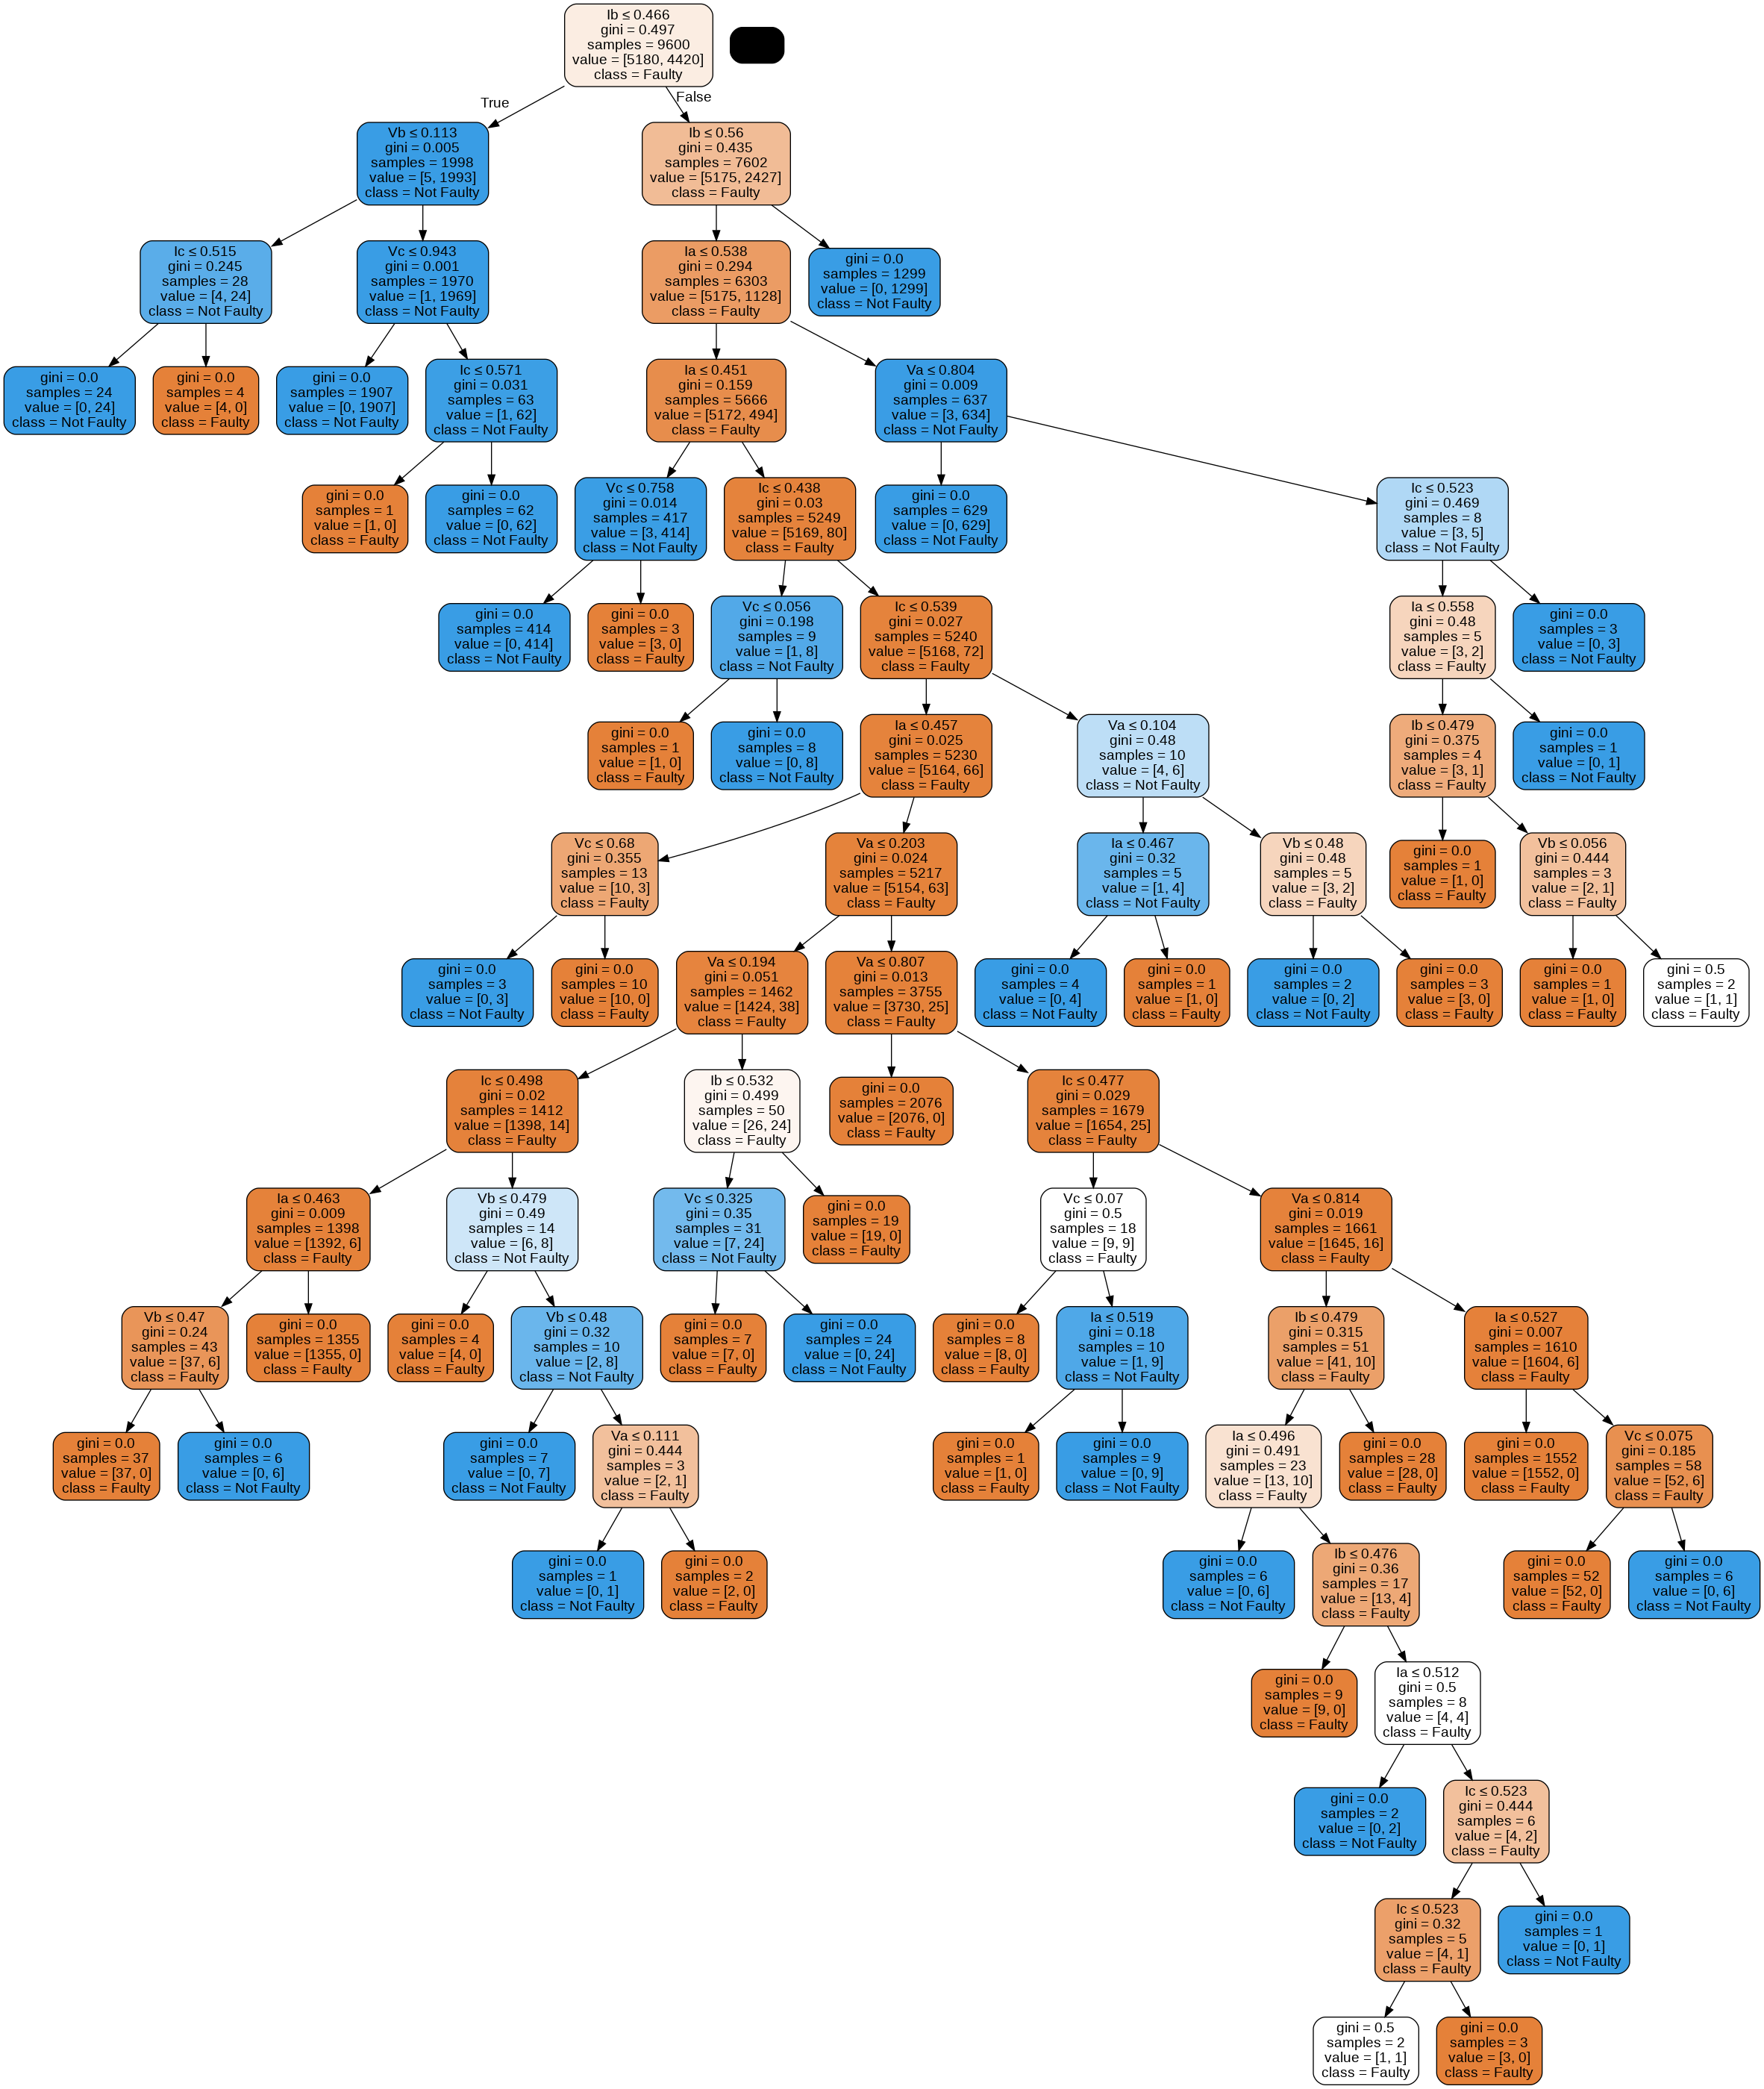

In [82]:
# Visualizing the decision tree
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = detect_cols, class_names=['Faulty', 'Not Faulty'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Fault.png')
Image(graph.create_png())

Gini Index is a metric to measure how often a randomly chosen element would be incorrectly identified. It means an attribute with lower gini index should be preferred.

## Random Forest Classifier

In [84]:
# Import the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [85]:
# The random_state variable is here to guarantee that we all see the same numbers.
# We will provide the some parameters such as min_samples_split and max_depth
forests = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forests = forests.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forests.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

Actual    Predicted
count  2401.000000  2401.000000
mean      0.448147     0.434819
std       0.497408     0.495836
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.000000     0.000000
75%       1.000000     1.000000
max       1.000000     1.000000

In [86]:
# Assessing how well our random forest is doing.
from sklearn import metrics

# Model accuracy - to show how often the classifier is correct

print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9858392336526447


###ROC Curve

In [87]:
# Determing the prob of our target
rf_prob = forests.predict_proba(X_test)[:,1]
#print(pd.DataFrame(rf_prob))

#predict_proba gives the probabilities for the target (0 and 1 in our case) in array form.
#The number of probabilities for each row is equal to the number of categories in target variable

In [88]:
from sklearn.metrics import roc_auc_score, roc_curve
# Calculate roc auc
false_positive_rate, true_positive_rate, threshold = metrics.roc_curve(y_test, rf_prob)
auc = metrics.roc_auc_score(y_test,rf_prob)

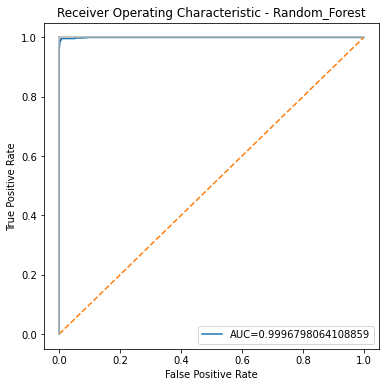

In [89]:
# Plotting the roc curve 

plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic - Random_Forest')
plt.plot(false_positive_rate, true_positive_rate, label="AUC="+str(auc))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.legend(loc=4)
plt.legend(loc="lower right")
plt.show()

With an AUC=99.97%, the model's performance is commendable.

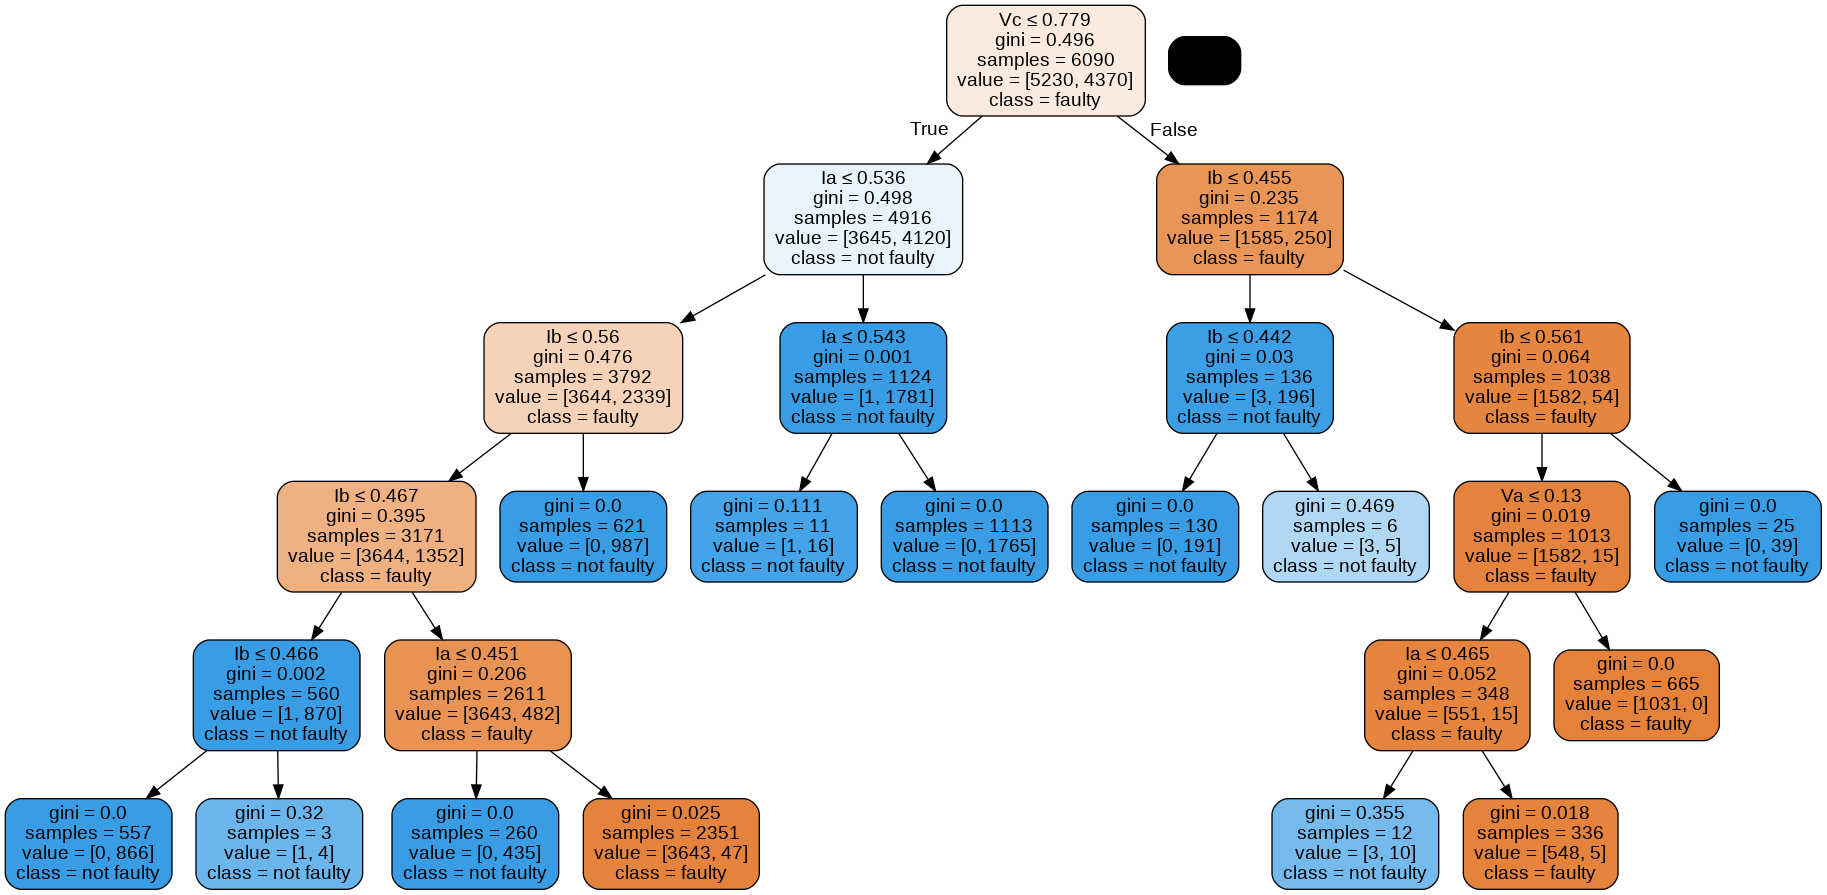

In [90]:
# Visualizing the random forest
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO

dot_data = StringIO()
# picking a specific tree from the forest
tree = forests.estimators_[80]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,special_characters=True, feature_names = detect_cols, class_names=['faulty', 'not faulty'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('fault_forest.png')
Image(graph.create_png())

In [91]:
# Split the detect dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(detect_X, detect_y, test_size=0.2, random_state=0)

##Naive Bayes

This type of classifier makes the assumption of normal distribution thus can be best used in cases when all our features are continuous.

In [92]:
#Defining the Model for the classification problem
from sklearn.naive_bayes import GaussianNB

detect_nb = GaussianNB()

#Fitting the data in different models
nb_model = detect_nb.fit(X_train,y_train)

#Predicting test values and printing out Mean Squared Error

predicted = nb_model.predict(X_test)

#print(np.mean(predicted==y_test))

print('The Error of our Classification Model is: ',mean_squared_error(y_test,predicted))

# Checking our model accuracy

print("The Accuracy of Naive Bayes model is: ", nb_model.score(X_test,y_test))

The Error of our Classification Model is:  0.024573094543940025
The Accuracy of Naive Bayes model is:  0.9754269054560599


##**Support Vector Machines (SVM)**

###Linear Kernel

In [93]:
# Building the svm model using linear kernel
detect_model_svm = SVC(kernel = 'linear')
# Training the model using the training set
detect_model_svm.fit(X_train,y_train)

# Predicting the response for the test set
y_pred_linear = detect_model_svm.predict(X_test)
y_pred_linear

# Now that we have trained our model, we test how well it predicts the fault labels 
# Checking the accurancy of the model
svm_model_accuracy = accuracy_score(y_test,y_pred_linear)
print(svm_model_accuracy)

0.7242815493544357


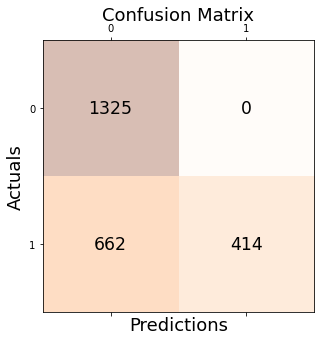

In [94]:
# For further evaluation, we check the confusion matrix
confusion_matrix_linear = confusion_matrix(y_test, y_pred_linear)
#print(confusion_matrix_svm)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confusion_matrix_linear, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(confusion_matrix_linear.shape[0]):
    for j in range(confusion_matrix_linear.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix_linear[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Of the 2401 observations, 1739 are correctly classified while 662 labels are wrongly classified.

###**Challenging the solution with SVM's Kernel functions: RBF, Polynomial and Sigmoid Functions.**




###Optimization: Parameter tuning 

For a non-linear kernel, we use gamma and C parameter to improve model performance. A lower value of Gamma will loosely fit the training dataset, while a high value of gamma will exactly fit the training dataset, which results in overfitting. Gamma is set before training the model to offer a curvature weight of the decision boundary.

C is a hypermeter set before the training of a model and is used to control classification error. It adds penalty for each misclassified data point. If C is small, the penalty for misclassified points is low so a decision boundary with a large margin is chosen at the expense of a greater number of misclassifications.

Under kernel trick, gamma and C need to be used simultaneously unlike in linear kernel. If gamma is large, the effect of C becomes negligible. If gamma is small, C affects the model just like it affects a linear model.

###Radial Basis Function(rbf) kernel

In [95]:
# Building the svm model using rbf kernel
rbfclassifier = SVC(kernel='rbf', C=5, gamma=5)
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

# making prediction
y_pred_rbf = rbfclassifier.predict(X_test)

# Model Evaluation
print( accuracy_score(y_test, y_pred_rbf))

0.9925031236984589


We've gotten a classification rate of 99.25%. This is a pretty good accuracy score.


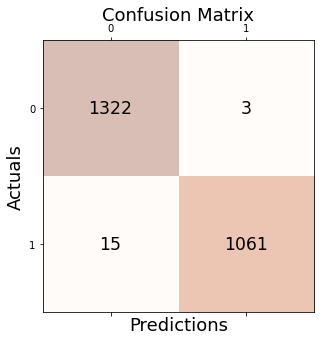

In [96]:
# For further evaluation, we check the confusion matrix
confusion_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
#print(confusion_matrix_svm)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confusion_matrix_rbf, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(confusion_matrix_rbf.shape[0]):
    for j in range(confusion_matrix_rbf.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix_rbf[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Out of 2401 observations, only 18 have been misclassified. 2383 of the 2401 are correctly classified. 

###Polynomial Function

In [97]:
# Building the svm model using rbf kernel
polyclassifier = SVC(kernel='poly', degree=3, gamma=5,C=5)
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

# making prediction
y_pred_poly = polyclassifier.predict(X_test)

# Model Evaluation
print( accuracy_score(y_test, y_pred_poly))

0.9933361099541858


Under polynomial function, our model performed well with an accuracy of 99.33%.

In [98]:
# Checking the confusion matrix
print(confusion_matrix(y_test,y_pred_poly))

[[1323    2]
 [  14 1062]]


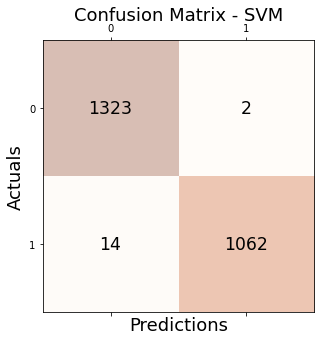

In [99]:
# For further evaluation, we check the confusion matrix
confusion_matrix_poly = confusion_matrix(y_test, y_pred_poly)
#print(confusion_matrix_svm)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confusion_matrix_poly, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(confusion_matrix_poly.shape[0]):
    for j in range(confusion_matrix_poly.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix_poly[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - SVM', fontsize=18)
plt.show()

Out of the 2401 observations, 2,385 are correctly classified and only 16 of them are misclassified. 

###Signoid Function kernel

In [100]:
# Building the svm model using rbf kernel
sigclassifier = SVC(kernel='sigmoid', C= 0.1)
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

# making prediction
y_pred_sig = sigclassifier.predict(X_test)

# Model Evaluation
print( accuracy_score(y_test, y_pred_sig))


0.5518533944189921


With an accuracy of 55.19%, the sigmoid kernel performs the worst. 

In [101]:
confusion_matrix(y_test,y_pred_sig)

array([[1325,    0],
       [1076,    0]])

Of the 2401 observations, only 914 of them are correctly predicted. 1,487 of these are misclassified.

##**Multi-Layer Perceptron**


The Multilayer Perceptron is a neural network where the mapping between inputs and output is non-linear; it is a supplement of feed forward neural network because inputs are combined with the initial weights in a weighted sum and subjected to the activation function with each linear combination being propagated to the next layer. To minimize cost function, backpropagation allows the Multilayer Perceptron to iteratively adjust the weights in the network by use of a differentiable function such as ReLu. 
MLP consists of three types of layers—the input layer, output layer and hidden layer as shown below:

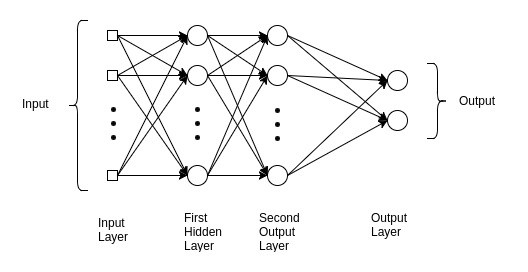

In [102]:
# Import relevant libraries 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error

In [103]:
#Defining the classification model for fault detection 

detection_model = MLPClassifier(activation='relu', solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(100,60,20), random_state=10,max_iter = 500)

* **Hidden_layer_sizes** : With this parameter we can specify the number of layers and the number of nodes we want to have in the Neural Network Classifier. Each element in the tuple represents the number of nodes at the ith position, where i is the index of the tuple. Thus, the length of the tuple indicates the total number of hidden layers in the neural network.
* **Max_iter**: Indicates the number of epochs.
* **Activation**: The activation function for the hidden layers.
* * **Relu** - used for the rectified linear unit - ReLu is common because it is both simple to implement and effective at overcoming the limitations of other previously popular activation functions, such as Sigmoid and Tanh. Specifically, it is less susceptible to vanishing gradients that prevent deep models from being trained, although it can suffer from other problems like saturated or “dead” units
* **Solver**: This parameter specifies the algorithm for weight optimization over the nodes.
* **Alpha**: In MLP, this is the penalty term. Just like in svm where we denoted our penalty term as c. It helps regulate cases of overfitting.

In [104]:
# Fitting the model

detection_model.fit(X_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100, 60, 20), max_iter=500,
              random_state=10)

In [105]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detection_model.predict(X_test)
print('The Error of our Detection Model is: ',mean_squared_error(y_test,detection_preds))

The Error of our Detection Model is:  0.005414410662224073


In [106]:
# Viewing a classification report.
print(classification_report(y_test,detection_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1325
           1       1.00      0.99      0.99      1076

    accuracy                           0.99      2401
   macro avg       1.00      0.99      0.99      2401
weighted avg       0.99      0.99      0.99      2401



The model is doing well in classification with an accuracy of 99%.

In [107]:
# Confirm accuracy
print('The accuracy score of our Detection Model is: ',(detection_model.score(X_test,y_test)))

The accuracy score of our Detection Model is:  0.994585589337776


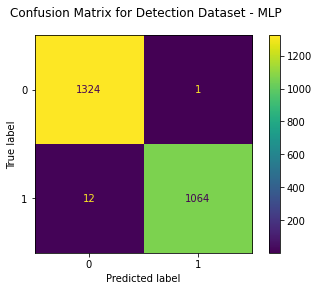

In [108]:
# Viewing a confusion matrix plot

from sklearn.metrics import plot_confusion_matrix

fig = plot_confusion_matrix(detection_model, X_test,y_test, display_labels=detection_model.classes_)
fig.figure_.suptitle("Confusion Matrix for Detection Dataset - MLP")
plt.show()

From the confusion matrix plot, our model correctly classified 2388 (1324+1064) labels. Only 13 labels are misclassified. 

###Loss Curve

One of the most used plots to debug a neural network is a Loss curve during training. It gives us a snapshot of the training process and the direction in which the network learns.
With low learning rates the improvements will be linear. With high learning rates they will start to look more exponential. Higher learning rates will decay the loss faster, but they get stuck at worse values of loss (green line). This is because there is too much "energy" in the optimization and the parameters are bouncing around chaotically, unable to settle in a nice spot in the optimization landscape

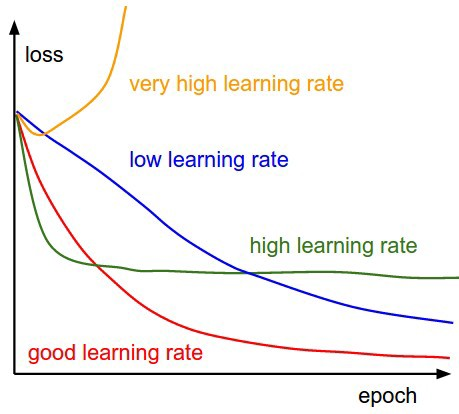

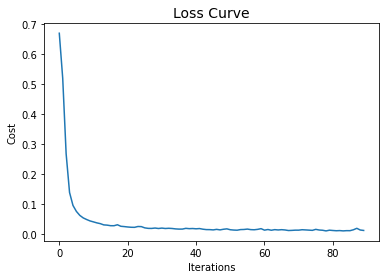

In [110]:
# Pltting Loss Curve 

plt.plot(detection_model.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Our model has a good learning rate. 

###Hyper Parameter Tuning

In [111]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [112]:
#grid = GridSearchCV(detection_model, param_grid, n_jobs= -1, cv=5)
#grid.fit(X_test,y_test)

#print(grid.best_params_) 

In [113]:
#grid_predictions = grid.predict(X_test) 

#print('Accuracy: {:.2f}'.format(accuracy_score(y_test,detection_preds)))

## Data preprocessing - Classification Dataset

In [114]:
# Creating column 'fault_types'
class_df['fault_types'] = class_df['G'].astype('str') + class_df['C'].astype('str') + class_df['B'].astype('str') + class_df['A'].astype('str')
class_df.sample(4)

G  C  B  A          Ia          Ib          Ic        Va        Vb  \
2585  0  1  1  0  -28.281763  772.452260 -741.533712  0.239041  0.004395   
6681  0  0  0  0  -53.416138   17.358595   32.845975  0.313127 -0.585339   
6616  0  0  0  0  -70.242802   77.634921  -10.623812 -0.278058 -0.319867   
2085  1  0  1  1  259.040286 -865.769489  -49.675080 -0.029982  0.136927   

            Vc fault_types  
2585 -0.243437        0110  
6681  0.272213        0000  
6616  0.597925        0000  
2085 -0.106945        1011

In [115]:
clf_X = class_df.drop(columns=['G','C','B','A','fault_types'],axis=1)
clf_cols = clf_X.columns

clf_y = class_df['fault_types']

In [116]:
#clf_X = class_df.drop(columns=['G','C','B','A'],axis=1)
#clf_cols = clf_X.columns

#class_y = class_df['GCBA']

#clf_y = class_df.iloc[:,0:4]

In [117]:
clf_y.sample(3)

7385    0000
7002    0000
7091    0000
Name: fault_types, dtype: object

In [118]:
# Scaling data

# MinMaxScaler preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data.
# Also, MinMaxScaler doesn’t reduce the importance of outliers. The default range for the feature returned by MinMaxScaler is 0 to 1.
# RobustScaler is used if one wans to reduce the effects of outliers, relative to MinMaxScaler.

scaler = MinMaxScaler()
class_scaled = scaler.fit_transform(clf_X)

clf_X = pd.DataFrame(class_scaled, columns= clf_cols)

In [119]:
# Splittind the dataset

class_train_X, class_test_X, class_train_y, class_test_y = train_test_split(clf_X,clf_y,test_size=0.2,random_state=0)

In [121]:
clf_X.head(4)

Ia        Ib        Ic        Va        Vb        Vc
0  0.413869  0.497571  0.543058  0.839985  0.384404  0.284358
1  0.309366  0.460370  0.505251  0.767607  0.391930  0.349258
2  0.215144  0.405429  0.449635  0.728956  0.399481  0.380317
3  0.163683  0.381381  0.424998  0.704108  0.407055  0.397513

In [122]:
clf_X.describe()

Ia           Ib           Ic           Va           Vb  \
count  7861.000000  7861.000000  7861.000000  7861.000000  7861.000000   
mean      0.507135     0.477929     0.514252     0.504141     0.492898   
std       0.262673     0.245348     0.207946     0.237770     0.253612   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.431667     0.351141     0.460780     0.403310     0.362904   
50%       0.500534     0.506056     0.492556     0.506096     0.493277   
75%       0.627819     0.553912     0.522501     0.602238     0.616173   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                Vc  
count  7861.000000  
mean      0.510537  
std       0.253855  
min       0.000000  
25%       0.327097  
50%       0.512818  
75%       0.703018  
max       1.000000

## Modelling - Classification Dataset

###Decision Tree classifier

In [124]:
# Create a decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier()

# Train it on our training set.
dtree_model = dtree_model.fit(class_train_X, class_train_y)

# Predict based on the model we've trained
y_pred_dt = dtree_model.predict(class_test_X)


#print('The Error of our Classification Model is: ',mean_squared_error(class_test_y,y_pred_dt))

print('The Accuracy of our Classification Model is:', metrics.accuracy_score(class_test_y,y_pred_dt))

The Accuracy of our Classification Model is: 0.8862047043865225


The model has a 87.60% accuracy in classifying the labels. 

###Random Forest Classifier

In [125]:
# The random_state variable is here to guarantee that we all see the same numbers.

class_forest = RandomForestClassifier(n_estimators = 80, min_samples_split =30)
class_forest = class_forest.fit(class_train_X, class_train_y)

# Predict based on the model we've trained
class_pred = class_forest.predict(class_test_X)

#comparison_frame = pd.DataFrame({'Actual': class_test_y, 'Predicted': class_pred})
#print(comparison_frame.describe())

In [126]:
# Assessing how well our random forest is doing.
from sklearn import metrics

# Model accuracy - to show how often the classifier is correct

print('Accuracy:', metrics.accuracy_score(class_test_y,class_pred))

Accuracy: 0.8086458995549904


###Parameter Tuning

In [127]:
# We will provide the some more parameters such as max_samples and max_depth
class_forest = RandomForestClassifier(n_estimators =120, random_state=42, min_samples_split =15, max_depth=5, max_samples=0.1)
class_forest = class_forest.fit(class_train_X, class_train_y)

# Predict based on the model we've trained
class_pred = class_forest.predict(class_test_X)

# Assessing how well our random forest is doing.
from sklearn import metrics

# Model accuracy - to show how often the classifier is correct

print('Accuracy:', metrics.accuracy_score(class_test_y,class_pred))

Accuracy: 0.8061029879211697


###Multi Layer Perceptron


In [128]:
class_model = MLPClassifier(solver='sgd', activation='tanh', alpha=1e-5,
                    hidden_layer_sizes=(100,60,20), random_state=42,max_iter = 300)

In [129]:
#Fitting the data in the model

class_model.fit(class_train_X,class_train_y)

MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=(100, 60, 20),
              max_iter=300, random_state=42, solver='sgd')

In [130]:
#Predicting test values

class_pred = class_model.predict(class_test_X)

# Generating a MLP's classification report.

print(classification_report(class_test_y,class_pred))

              precision    recall  f1-score   support

        0000       0.93      1.00      0.96       469
        0110       0.98      0.82      0.89       197
        0111       0.42      0.29      0.34       223
        1001       0.82      0.92      0.87       221
        1011       0.71      0.81      0.76       219
        1111       0.47      0.48      0.48       244

    accuracy                           0.76      1573
   macro avg       0.72      0.72      0.72      1573
weighted avg       0.75      0.76      0.75      1573



###Hyperparameter Tuning

In [131]:
class_model_mlp = MLPClassifier(activation='relu', solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(150,100,50), random_state=10,max_iter = 600)

In [132]:
#Fitting the data in the model

class_model_mlp.fit(class_train_X,class_train_y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(150, 100, 50), max_iter=600,
              random_state=10)

In [133]:
#Predicting test values 
class_preds = class_model_mlp.predict(class_test_X)

In [134]:
# Generating a MLP's classification report.

print(classification_report(class_test_y,class_preds))

              precision    recall  f1-score   support

        0000       1.00      1.00      1.00       469
        0110       0.99      1.00      1.00       197
        0111       0.54      0.28      0.37       223
        1001       0.95      1.00      0.98       221
        1011       0.97      0.95      0.96       219
        1111       0.53      0.76      0.63       244

    accuracy                           0.85      1573
   macro avg       0.83      0.83      0.82      1573
weighted avg       0.85      0.85      0.84      1573



In [135]:
# Printing out accuracy scores of our models

print('The accuracy score of our Classification Model is: ',(class_model_mlp.score(class_test_X,class_test_y)))

The accuracy score of our Classification Model is:  0.852511125238398


Performance improved from 76% accuracy to 85% accuracy on hyperparameter tuning 

###Naive Bayes


In [136]:
#Defining the Model for the classification problem
from sklearn.naive_bayes import GaussianNB


In [137]:
#Defining the Model for the classification problem
from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB()

#Fitting the data in different models
model_naive = clf_nb.fit(class_train_X,class_train_y)

#Predicting test values and printing out Mean Squared Error
predicted = model_naive.predict(class_test_X)

# Checking our model accuracy
print("The Accuracy of Naive Bayes model is: ", model_naive.score(class_test_X,class_test_y))

The Accuracy of Naive Bayes model is:  0.7940241576605213


###KNN

In [138]:
from sklearn.metrics.pairwise import euclidean_distances
# Train the model with KNN classifier
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 10, metric='euclidean',weights='distance')
classifier_knn.fit(class_train_X, class_train_y)

KNeighborsClassifier(metric='euclidean', n_neighbors=10, weights='distance')

In [139]:
#Making predictions
y_pred_knn = classifier_knn.predict(class_test_X)

In [140]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

clf_report = classification_report(class_test_y, y_pred_knn)
print("Classification Report:",)
print (clf_report)
model_accuracy = accuracy_score(class_test_y,y_pred_knn)
print("Accuracy:",model_accuracy)

Classification Report:
              precision    recall  f1-score   support

        0000       1.00      1.00      1.00       469
        0110       1.00      0.99      1.00       197
        0111       0.58      0.61      0.60       223
        1001       0.95      1.00      0.98       221
        1011       0.96      0.95      0.95       219
        1111       0.62      0.57      0.59       244

    accuracy                           0.87      1573
   macro avg       0.85      0.85      0.85      1573
weighted avg       0.87      0.87      0.87      1573

Accuracy: 0.8696757787666879


Our KNN model has an accuracy of 87% in classifying all the labels. 

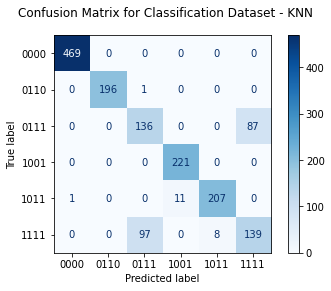

In [141]:
# Viewing a confusion matrix plot

from sklearn.metrics import plot_confusion_matrix

fig = plot_confusion_matrix(classifier_knn, class_test_X,class_test_y, display_labels=classifier_knn.classes_,cmap=plt.cm.Blues)
fig.figure_.suptitle("Confusion Matrix for Classification Dataset - KNN")
plt.show()

###Support Vector Machines (SVM)

###Linear Kernel

In [142]:
# Building the svm model using linear kernel
class_model_linear = SVC(kernel = 'linear')
# Training the model using the training set
class_model_linear.fit(class_train_X,class_train_y)

# Predicting the response for the test set
y_pred_linClass = class_model_linear.predict(class_test_X)
y_pred_linClass

# Now that we have trained our model, we test how well it predicts the fault labels 
# Checking the accurancy of the model
class_model_accuracy = accuracy_score(class_test_y,y_pred_linClass)
print(class_model_accuracy)

0.45454545454545453


###RBF Kernel

In [143]:
# Building the svm model using rbf kernel
rbfclf = SVC(kernel='rbf', C=2, gamma=5)
# Training the model using the training set
rbfclf.fit(class_train_X, class_train_y)

# making prediction
class_pred = rbfclf.predict(class_test_X)

# Model Evaluation
print( accuracy_score(class_test_y, class_pred))

0.8143674507310871


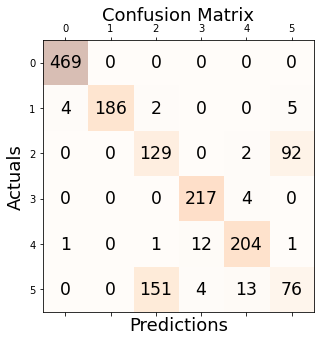

In [144]:
# For further evaluation, we check the confusion matrix
confusion_matrix_class = confusion_matrix(class_test_y, class_pred)
#print(confusion_matrix_svm)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confusion_matrix_class, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(confusion_matrix_class.shape[0]):
    for j in range(confusion_matrix_class.shape[0]):
        ax.text(x=j, y=i,s=confusion_matrix_class[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

###Polynomial Function

In [145]:
# Building the svm model using rbf kernel
polyclf = SVC(kernel='poly', degree=3, gamma=5,C=5)
# Training the model using the training set
polyclf.fit(class_train_X, class_train_y)

# making prediction
class_y_pred = polyclf.predict(class_test_X)

# Model Evaluation
# Checking the confusion matrix
print('Confusion_Matrix:')
print(confusion_matrix(class_test_y,class_y_pred))
print('*******************')
print('Model_Accuracy:') 
print(accuracy_score(class_test_y, class_y_pred))

Confusion_Matrix:
[[469   0   0   0   0   0]
 [  0 197   0   0   0   0]
 [  0   0 131   0   0  92]
 [  0   0   0 221   0   0]
 [  0   0   1   8 210   0]
 [  0   0 127   0   0 117]]
*******************
Model_Accuracy:
0.8550540368722187


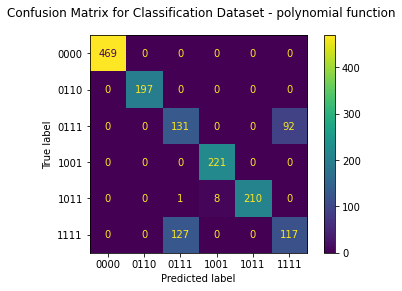

In [146]:
# Plotting a confusion matrix results
fig = plot_confusion_matrix(polyclf, class_test_X,class_test_y, display_labels=polyclf.classes_)
fig.figure_.suptitle("Confusion Matrix for Classification Dataset - polynomial function")
plt.show()

Only 1 out of 1,573 observations is misclassified. 

###Sigmoid Function

In [147]:
# Building the svm model using rbf kernel
sigclf = SVC(kernel='sigmoid',degree=3, C= 10, gamma=10)
# Training the model using the training set
sigclf.fit(class_train_X, class_train_y)

# making prediction
sig_pred = sigclf.predict(class_test_X)

# Model Evaluation
print( accuracy_score(class_test_y, sig_pred))


0.29815638906548


In [148]:
print(confusion_matrix(class_test_y,sig_pred))

[[469   0   0   0   0   0]
 [197   0   0   0   0   0]
 [223   0   0   0   0   0]
 [221   0   0   0   0   0]
 [219   0   0   0   0   0]
 [244   0   0   0   0   0]]


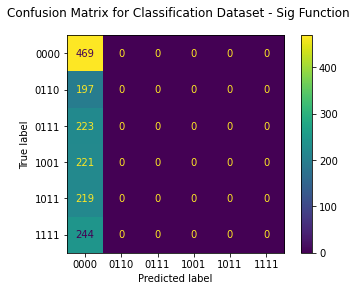

In [149]:
fig = plot_confusion_matrix(sigclf, class_test_X,class_test_y, display_labels=sigclf.classes_)
fig.figure_.suptitle("Confusion Matrix for Classification Dataset - Sig Function")
plt.show()

Sigmoid function performed poorly in classifying the labels.